# Import required libraries

In [2]:
import plotly
print(plotly.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
# Basic packages
import numpy as np, gc
from scipy import stats; 
from scipy.stats import zscore, norm
from scipy.stats import randint as sp_randint
import matplotlib.style as style; 
style.use('fivethirtyeight')

# Models
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from wordcloud import WordCloud, STOPWORDS
 
# Display settings
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format
 
random_state = 42
np.random.seed(random_state)
import copy
import holidays
# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

import random, re
import time

# used to supress display of warnings
import warnings

import missingno as mno

# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet');

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from wordcloud import WordCloud
import string

from collections import defaultdict
from collections import  Counter

# import holoviews as hv
# from holoviews import opts

import os;
from os import makedirs

from gensim.models import Word2Vec

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_extraction.text import CountVectorizer

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.layers import Input
from keras.layers.merge import Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

5.2.2
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\G621315\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\G621315\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\G621315\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Define common fuctions

In [3]:
# Color Class to Bold and Color words while printing
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [4]:
# function to create month variable into seasons
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [5]:
# function to plot top Stopwords
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

In [6]:
#function to plot the top n-grams for a text
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

In [7]:
#Helper functions to get cleaned text column
nltk.download('averaged_perceptron_tagger')

appos = {"ain't": "am not", "aren't": "are not", "can't": "cannot", 
         "can't've": "cannot have", "'cause": "because", 
         "could've": "could have", "couldn't": "could not", 
         "couldn't've": "could not have", "didn't": "did not", 
         "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
         "hadn't've": "had not have", "hasn't": "has not", 
         "haven't": "have not", "he'd": "he would", "he'd've": "he would have", 
         "he'll": "he will", "he'll've": "he will have", 
         "he's": "he is", "how'd": "how did", 
         "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
         "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
         "I'll've": "I will have", "I'm": "I am", "I've": "I have", 
         "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
         "it'll": "it will", "it'll've": "it will have", "it's": "it is", 
         "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
         "might've": "might have", "mightn't": "might not", 
         "mightn't've": "might not have", "must've": "must have", 
         "mustn't": "must not", "mustn't've": "must not have", 
         "needn't": "need not", "needn't've": "need not have",
         "o'clock": "of the clock", "oughtn't": "ought not", 
         "oughtn't've": "ought not have", "shan't": "shall not", 
         "sha'n't": "shall not", "shan't've": "shall not have", 
         "she'd": "she would", "she'd've": "she would have", 
         "she'll": "she will", "she'll've": "she will have",
         "she's": "she is", "should've": "should have", 
         "shouldn't": "should not", "shouldn't've": "should not have", 
         "so've": "so have", "so's": "so is", 
         "that'd": "that had", "that'd've": "that would have", 
         "that's": "that that is", "there'd": "there would", 
         "there'd've": "there would have", "there's": "there is", 
         "they'd": "they would", "they'd've": "they would have", 
         "they'll": "they will", "they'll've": "they will have", 
         "they're": "they are", "they've": "they have", 
         "to've": "to have", "wasn't": "was not", "we'd": "we would", 
         "we'd've": "we would have", "we'll": "we will", 
         "we'll've": "we will have", "we're": "we are", 
         "we've": "we have", "weren't": "were not", 
         "what'll": "what will", "what'll've": "what will have", 
         "what're": "what are", "what's": "what is", 
         "what've": "what have", "when's": "when is", 
         "when've": "when have", "where'd": "where did", 
         "where's": "where is", "where've": "where have", 
         "who'll": "who will", "who'll've": "who will have", 
         "who's": "who is", "who've": "who have", 
         "why's": "why is", "why've": "why have", "will've": "will have", 
         "won't": "will not", "won't've": "will not have",
         "would've": "would have", "wouldn't": "would not", 
         "wouldn't've": "would not have", "y'all": "you all", 
         "y'all'd": "you all would", "y'all'd've": "you all would have", 
         "y'all're": "you all are", "y'all've": "you all have", 
         "you'd": "you would", "you'd've": "you would have",
         "you'll": "you will", "you'll've": "you will have", 
         "you're": "you are", "you've": "you have"}

# Helper function to replace appos
def replace_words(description):
    cleaned_description = []
    for word in str(description).split():
        if word.lower() in appos.keys():
            cleaned_description.append(appos[word.lower()])
        else:
            cleaned_description.append(word)
    return ' '.join(cleaned_description)

# Helper function to remove punctuations
# Reference: https://www.programiz.com/python-programming/methods/string/translate
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' #string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Helper function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ''.join([lemmatizer.lemmatize(word) for word in text])

# Helper function to remove stopwords
stoplist = set(stopwords.words('english'))
stoplist.update(('cm', 'kg', 'mr', 'wa' ,'nv', 'ore', 'da', 'pm', 'am', 'cx'))
stoplist.remove('not')
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stoplist])

# Helper function for wordcloud
# Reference: https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(text, mask = None, max_words = 500, max_font_size = 40, 
                   figure_size = (12, 6), title = None, title_size = 15):
    wordcloud = WordCloud(background_color = 'white', max_words = max_words,
                          random_state = 42, width = 350, height = 150, 
                          mask = mask, stopwords = stoplist, collocations = False)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    plt.imshow(wordcloud, interpolation = 'bilinear');
    plt.title(title, fontdict = {'size': title_size, 'color': 'black', 
                               'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

# Second helper function for lemmatizing
# lemmatizer = WordNetLemmatizer()
# def lem(text):
#     pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
#     return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

#Functions to get cleaned text column
def get_cleaned_desc(df, col_to_clean, cleaned_col_name):
      print(color.GREEN + 'Converting description to lower case' + color.END)
      df[cleaned_col_name] = df[col_to_clean].apply(lambda x : x.lower())
      
      print(color.GREEN + 'Replacing apostrophes to the standard lexicons' + color.END)
      df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x : replace_words(x))
      
      print(color.GREEN + 'Removing punctuations' + color.END)
      df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x: remove_punctuation(x))
      
      print(color.GREEN + 'Applying Lemmatizer' + color.END)
      df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x: lemmatize(x))
      
      print(color.GREEN + 'Removing multiple spaces between words' + color.END)
      df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x: re.sub(' +', ' ', x))
      
      print(color.GREEN + 'Removing stop words' + color.END)
      df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x: remove_stopwords(x))

      return df

def get_cleaned_desc_wo_print(df, col_to_clean, cleaned_col_name):
    df[cleaned_col_name] = df[col_to_clean].apply(lambda x : x.lower())
    df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x : replace_words(x))
    df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x: remove_punctuation(x))
    df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x: lemmatize(x))
    df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x: re.sub(' +', ' ', x))
    df[cleaned_col_name] = df[cleaned_col_name].apply(lambda x: remove_stopwords(x))
    return df

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\G621315\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [9]:
#Helper classes for Machine Learning, Neural Network and NLP models

def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions
    
    
def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common


def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                 scoring = mll_scorer, error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

    
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')

  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')

  return accuracy, precision, recall, f1


class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

# Import data from Google Drive

In [10]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [11]:
#data = pd.read_csv('/content/gdrive/MyDrive/Capstone/Data Set - industrial_safety_and_health_database_with_accidents_description.csv', index_col=None, header=0)

In [12]:
data = pd.read_csv('industrial_safety_and_health_database_with_accidents_description.csv', index_col=None, header=0)

In [13]:
print("Number of rows = " + color.GREEN + str(data.shape[0]) + color.END + " and Number of Columns = " + color.GREEN + str(data.shape[1]) + color.END + " in the Data frame")

Number of rows = 425 and Number of Columns = 11 in the Data frame


# EDA and Preprocessing

In [14]:
data.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

In [15]:
data.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

##  Get distinct values in each column

In [16]:
for col in data:
    if str(col)!='Description':
        print("\n" + color.BLUE + color.UNDERLINE + color.BOLD + str(col).upper() + color.END + "\n")
        print(data[col].unique())


UNNAMED: 0

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 2

In [17]:
datadict = pd.DataFrame(data.dtypes)
datadict['MissingVal'] = data.isnull().sum()
datadict['NUnique']=data.nunique()
datadict

0  MissingVal  NUnique
Unnamed: 0                 int64           0      425
Data                      object           0      287
Countries                 object           0        3
Local                     object           0       12
Industry Sector           object           0        3
Accident Level            object           0        5
Potential Accident Level  object           0        6
Genre                     object           0        2
Employee or Third Party   object           0        3
Critical Risk             object           0       33
Description               object           0      411

In [18]:
data.describe(include=['object'])

Data   Countries     Local Industry Sector  \
count                   425         425       425             425   
unique                  287           3        12               3   
top     2017-02-08 00:00:00  Country_01  Local_03          Mining   
freq                      6         251        90             241   

       Accident Level Potential Accident Level Genre Employee or Third Party  \
count             425                      425   425                     425   
unique              5                        6     2                       3   
top                 I                       IV  Male             Third Party   
freq              316                      143   403                     189   

       Critical Risk                                        Description  
count            425                                                425  
unique            33                                                411  
top           Others  On 02/03/17 during the soil sampling in the re...  
freq             232                                                  3



*   Country_01 is the country where most of the accidents happen (more than 50%)
*   Local_03 (which also belongs to Country_01) is where most of the accidents happen
*   Mining is also the most significant contributor to accidents
*   Male (95%) and Third Party (43%) also counts for kind of people that suffers more accident

In [19]:
industry_df = copy.deepcopy(data)

## Rename columns to more Python standard naming

In [20]:
industry_df.drop("Unnamed: 0", axis=1, inplace=True)

industry_df.rename(columns={'Data':'date', 
                            'Countries':'country', 
                            'Local':'local',
                            'Industry Sector':'industry_sector',
                            'Accident Level':'accident_level',
                            'Potential Accident Level':'potential_accident_level',
                            'Genre':'gender', 
                            'Employee or Third Party':'emp_type',
                            'Critical Risk':'critical_risk',
                            'Description':'description'}
                   , inplace=True)


industry_df.head()

date     country     local industry_sector accident_level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  potential_accident_level gender              emp_type        critical_risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

## Check for duplicates

In [21]:
industry_df.duplicated().sum()

7

In [22]:
duplicates = industry_df.duplicated()

industry_df[duplicates]

date     country     local industry_sector accident_level  \
77   2016-04-01 00:00:00  Country_01  Local_01          Mining              I   
262  2016-12-01 00:00:00  Country_01  Local_03          Mining              I   
303  2017-01-21 00:00:00  Country_02  Local_02          Mining              I   
345  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
346  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
355  2017-03-15 00:00:00  Country_03  Local_10          Others              I   
397  2017-05-23 00:00:00  Country_01  Local_04          Mining              I   

    potential_accident_level gender              emp_type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               critical_risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

In [23]:
industry_df.drop_duplicates(inplace=True)
industry_df.shape

(418, 10)

## Preprocessing on 'Date' column

Split 'Date' to Year, Month, Day etc.

In [24]:
industry_df['date'] = pd.to_datetime(industry_df['date'])

industry_df['year'] = industry_df.date.apply(lambda x : x.year)
industry_df['month'] = industry_df.date.apply(lambda x : x.month)
industry_df['day'] = industry_df.date.apply(lambda x : x.day)
industry_df['weekday'] = industry_df.date.apply(lambda x : x.day_name())
industry_df['week_of_year'] = industry_df.date.apply(lambda x : x.weekofyear)

industry_df.head()

date     country     local industry_sector accident_level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  potential_accident_level gender              emp_type        critical_risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     weekday  week_of_year  
0     Friday            53  
1   Saturday            53  
2  Wednesday             1  
3     Friday             1  
4     Sunday             1

Add 'Season' column based on months

In [25]:
industry_df['season'] = industry_df['month'].apply(month2seasons)
industry_df.head(3)

date     country     local industry_sector accident_level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  potential_accident_level gender              emp_type        critical_risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     weekday  week_of_year  season  
0     Friday            53  Summer  
1   Saturday            53  Summer  
2  Wednesday             1  Summer

Mark Offical Holidays for Brazil in the 'is_holiday' column as '1'

In [26]:
brazil_holidays = []

print(color.GREEN + color.BOLD + 'List of Brazil holidays in 2016' + color.END)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print(color.GREEN + color.BOLD + 'List of Brazil holidays in 2017' + color.END)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

List of Brazil holidays in 2016
(datetime.date(2016, 1, 1), 'Ano novo')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 3, 27), 'Páscoa')
(datetime.date(2016, 5, 26), 'Corpus Christi')
(datetime.date(2016, 2, 10), 'Quarta-feira de cinzas (Início da Quaresma)')
(datetime.date(2016, 2, 9), 'Carnaval')
List of Brazil holidays in 2017
(datetime.date(2017, 1, 1), 'Ano novo')
(datetime.date(2017, 4, 21), 'Tiradentes')
(datetime.date(2017, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2017, 9, 7), 'Independência do Brasil')
(datetime.date(2017, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2017, 11, 2), 'Finados')
(dateti

In [27]:
industry_df['is_holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in industry_df['date']]
industry_df.head(3)

date     country     local industry_sector accident_level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  potential_accident_level gender              emp_type        critical_risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         description  year  month  day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     weekday  week_of_year  season  is_holiday  
0     Friday            53  Summer           1  
1   Saturday            53  Summer           0  
2  Wednesday             1  Summer           0

## Exploratory Data Analysis

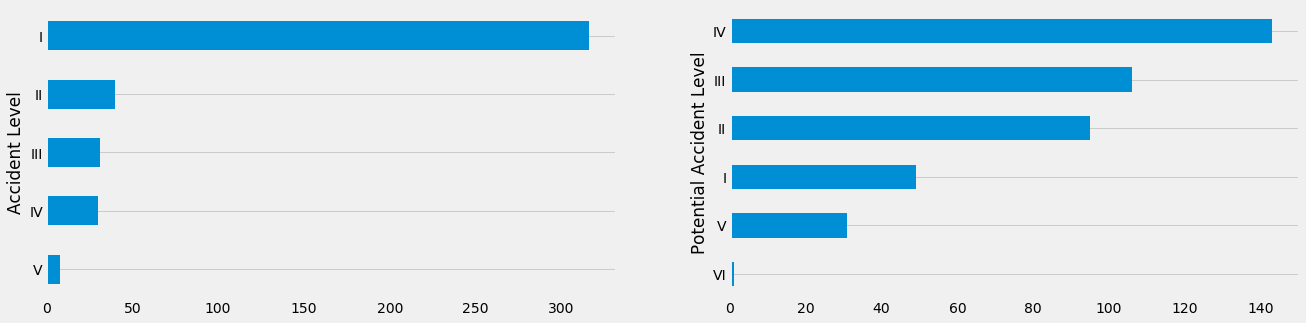

In [28]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
data[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
data[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')


plt.show()

In [29]:
fig = px.pie(industry_df, names='country', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

1.   59% accidents reported in Country_01
2.   31% accidents reported in Country_02
3.   10% accidents reported in Country_03


In [30]:
fig = px.pie(industry_df, names='industry_sector', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

1.   56.7% accidents reported in Mining
2.   32.1% accidents reported in Metals
3.   11.2% accidents reported in Others


In [31]:
fig = px.pie(industry_df, names='emp_type', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

1.   44.3% accidents reported in Third_Party
2.   42.6% accidents reported in Employee
3.   13.2% accidents reported in Third Party (Remote)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

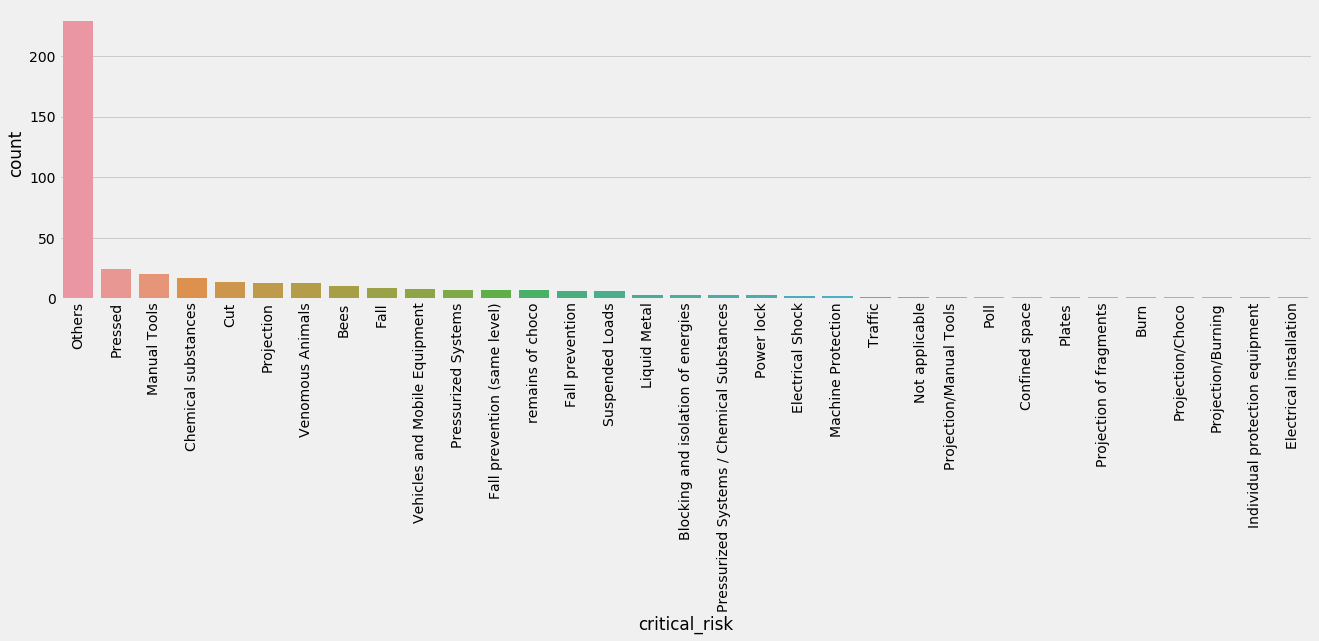

In [32]:
plt.figure(figsize=(20,5))
descending_order = industry_df['critical_risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=industry_df['critical_risk'],order=descending_order)
plt.xticks(rotation = 'vertical')

Critical Risk 'Others' has been reported more that 200 times


In [33]:
fig = px.pie(data, names='Local', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

Local 3 has reported more that 20% of the total accidents

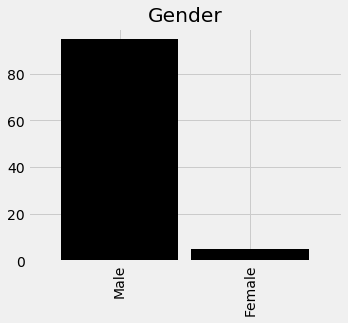

In [34]:
gender_cnt = np.round(industry_df['gender'].value_counts(normalize=True) * 100)

gender_cnt.plot(kind='bar', figsize=(5,4), width=0.9, cmap='gray', title='Gender')
#plt.bar(gender_cnt).opts(title="Gender Count", color="#8888ff", xlabel="Gender", ylabel="Percentage", yformatter='%d%%')\


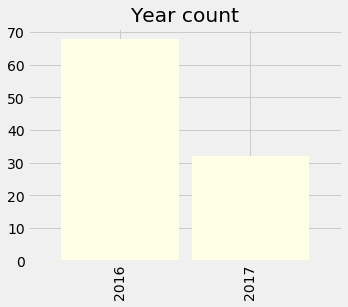

In [35]:
year_cnt = np.round(industry_df['year'].value_counts(normalize=True,sort=False) * 100)
year_cnt.plot(kind='bar', figsize=(5,4), width=0.9, cmap='YlGn', title='Year count')

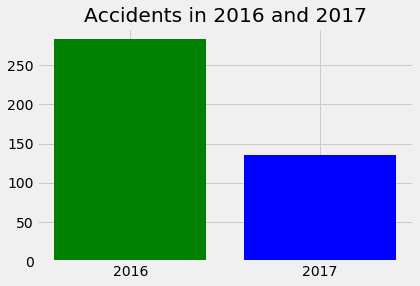

In [36]:
# collecting year in list to work with it.

y_r = industry_df['date'].dt.year
y_16 = len(y_r[y_r==2016])   # checking if there is 2016 in list and getting total numbers of it.
y_17 = len(y_r[y_r==2017])   # checking if there is 2017 in list and getting total numbers of it.
x_axis = ["2016", "2017"]
y_axis = [y_16,  y_17]
plt.bar(x_axis, y_axis, color = ['green', 'blue'])
plt.title("Accidents in 2016 and 2017")
plt.show()

The chart shows a declining trend in the number of accidents as 2016 and as 2017 .

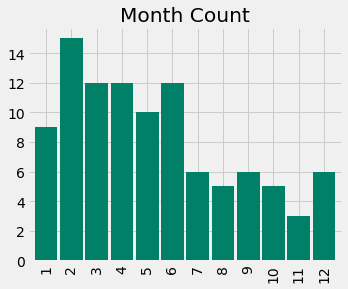

In [37]:
month_cnt = np.round(industry_df['month'].value_counts(normalize=True,sort=False) * 100)
month_cnt.plot(kind='bar', figsize=(5,4), width=0.9, cmap='summer', title='Month Count')

This chart again shows a higher rate of accidents in the first 6 months of the year which can again be attributed to having twice the data as compared to the ast 6 months. However, it is important to note that month 2 (Feb) has a much higher count of accidents though the number of days (29) are less in that month.

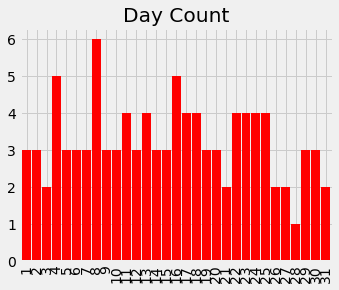

In [38]:
day_cnt = np.round(industry_df['day'].value_counts(normalize=True,sort=False) * 100)
day_cnt.plot(kind='bar', figsize=(5,4), width=0.9, cmap='hsv', title='Day Count')

Here, it is seen that the days - 4, 8 and 16 have the most number of accidents reported.

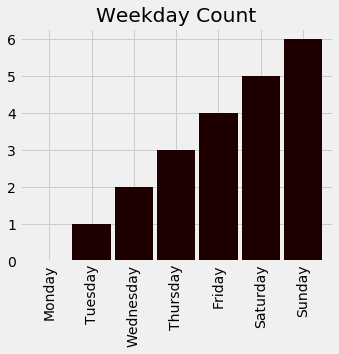

In [39]:
weekday_cnt = pd.DataFrame(np.round(industry_df['weekday'].value_counts(normalize=True,sort=False) * 100))
weekday_cnt['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekday_cnt.index]
weekday_cnt.sort_values('week_num', inplace=True)

#hv.Bars((weekday_cnt.index, weekday_cnt.weekday)).opts(title="Weekday Count", color="#8888ff", xlabel="Weekdays") * hv.Curve(weekday_cnt['weekday']).opts(width=500, height=300, color='red', line_width=3

weekday_cnt['week_num'].plot(kind='bar', figsize=(5,4), width=0.9, cmap='pink', title='Weekday Count')

Tuesdays and Thurdays have a higher than average accident count

In [40]:
# Helper function for relation between Accident Level/Potential Accident levels and other labels
def target_count(df, col1):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = 'accident_level').set_title(col1.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['accident_level'].unique())
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v', 
                  hue = 'potential_accident_level').set_title(col1.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['potential_accident_level'].unique())
    plt.xticks(rotation = 90)
    return plt.show()

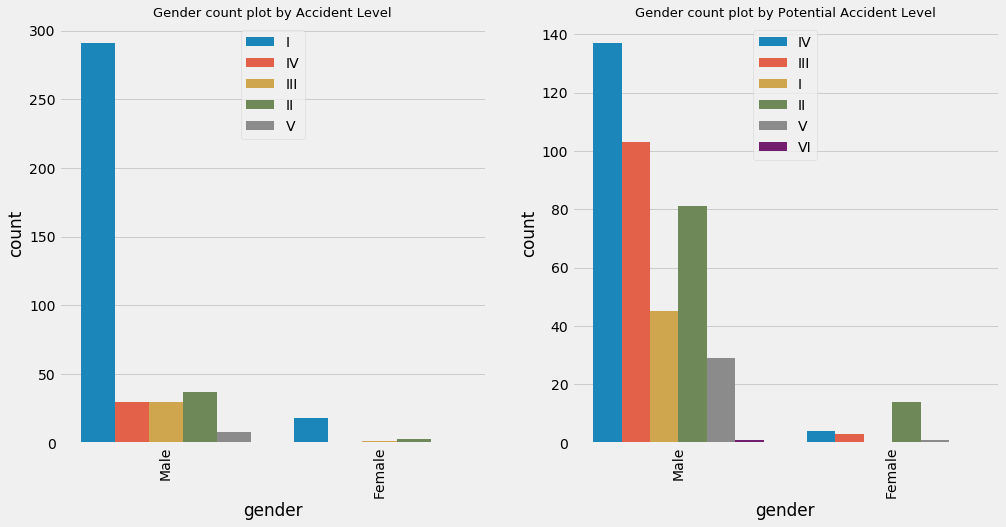

In [41]:
target_count(industry_df, 'gender')

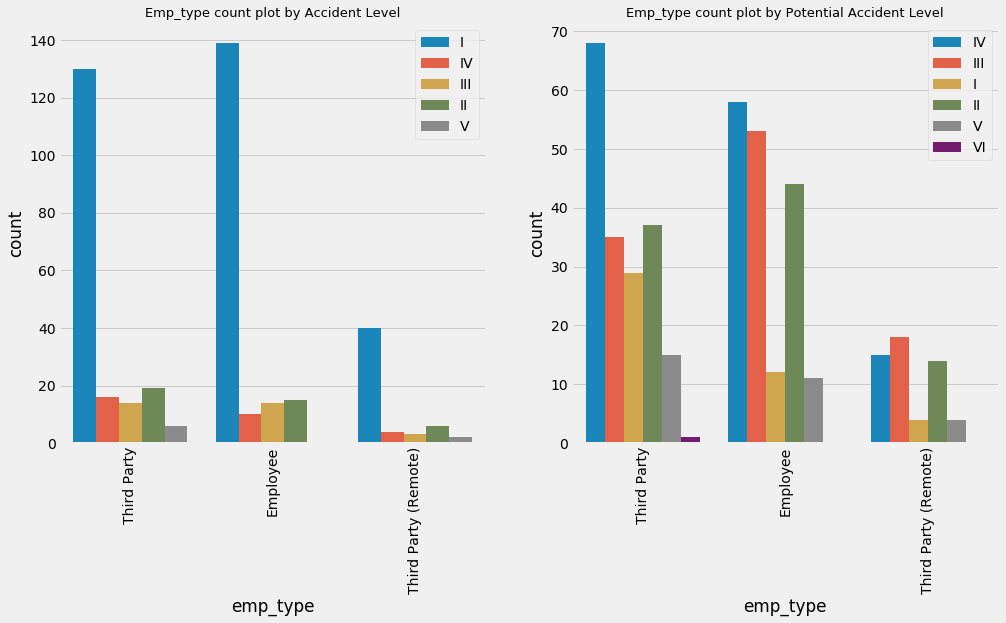

In [42]:
target_count(industry_df, 'emp_type')

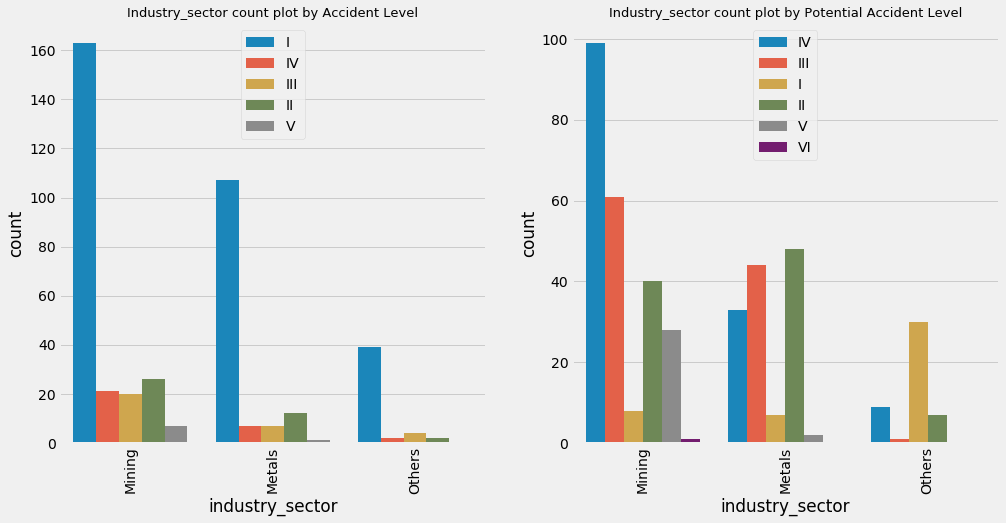

In [43]:
target_count(industry_df, 'industry_sector')

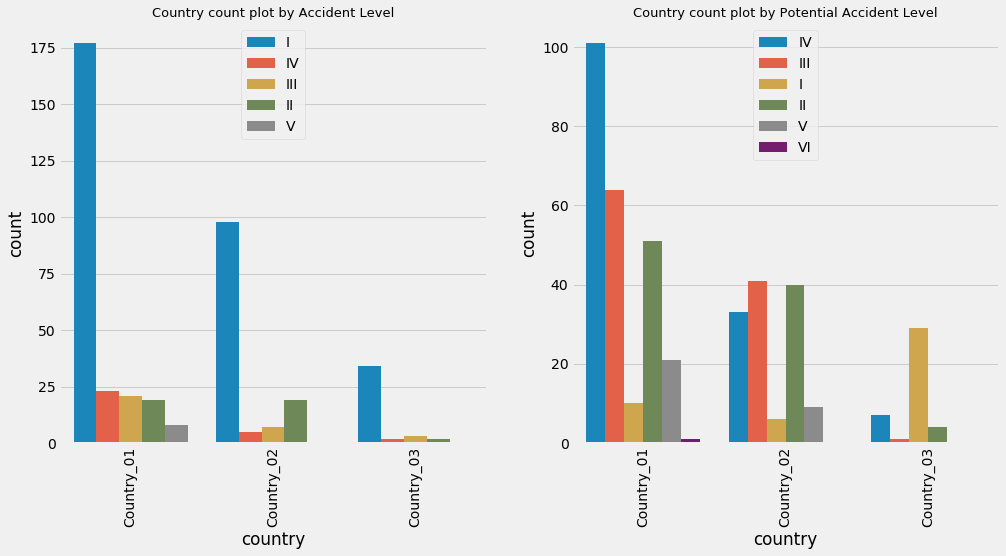

In [44]:
target_count(industry_df, 'country')

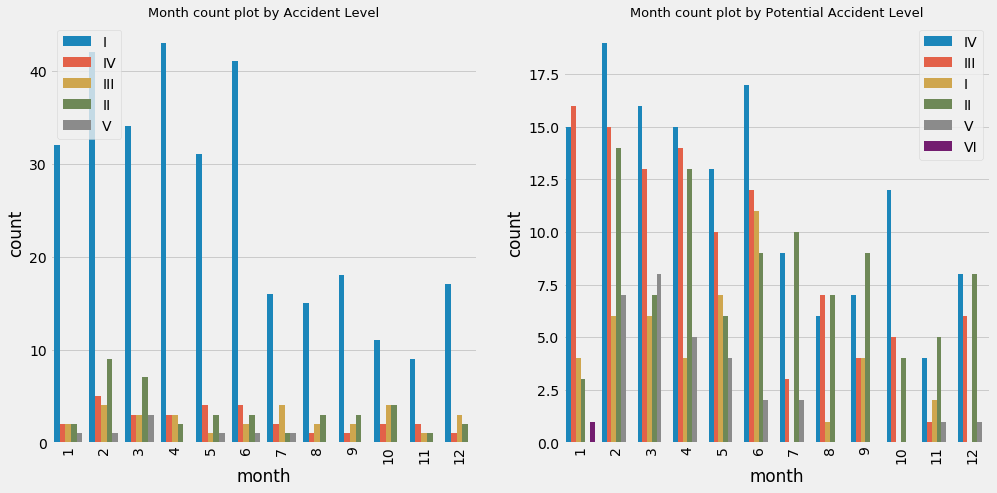

In [45]:
target_count(industry_df, 'month')

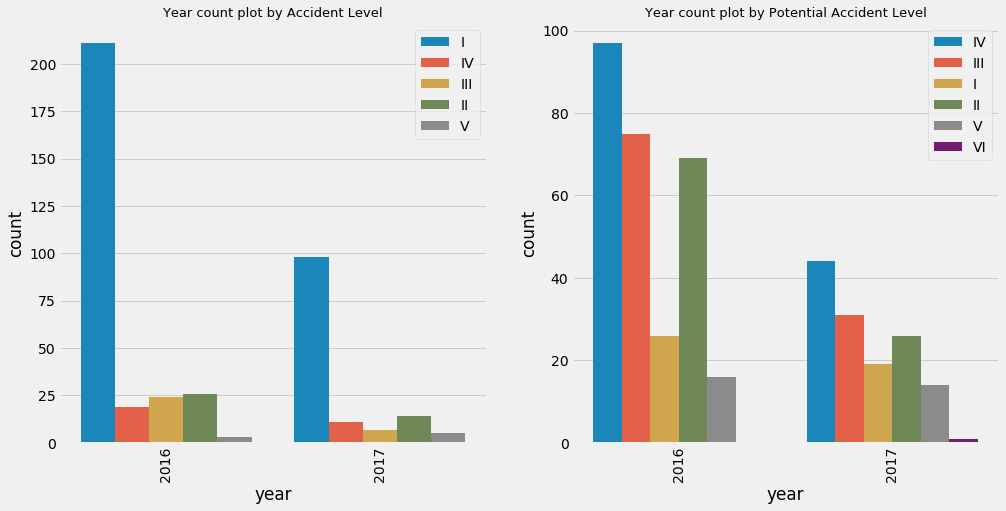

In [46]:
target_count(industry_df, 'year')

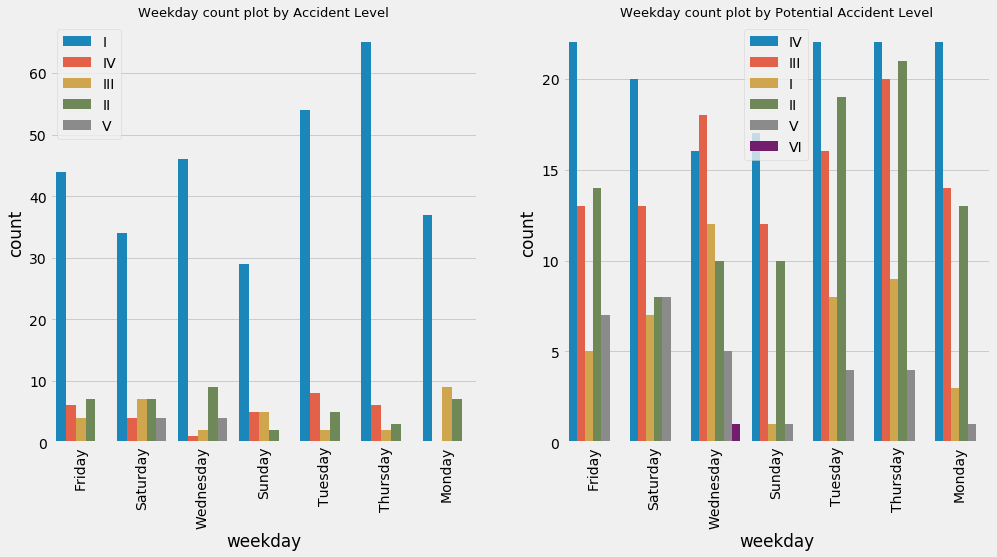

In [47]:
target_count(industry_df, 'weekday')

1. The 'Accident Level' column is skewed with a lot of data for the less severe level 1. This can be seen in the huge disparity within the counts of the different level.
2. The 'Potential Accident Level' is more balance across all levels. Except for level VI which has only 1 record.

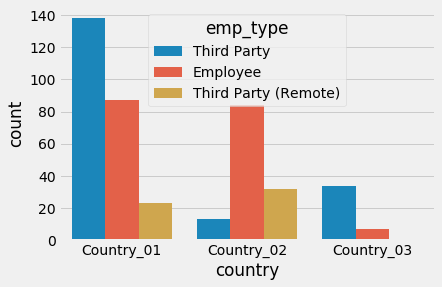

In [48]:
sns.countplot(x="country", data=industry_df, hue="emp_type")

1. Country_01 has a lot of Third Party accidents followed by Employee accidents.
2. Country_02 has a lot of Employee accidents followed by Third Party (Remote) accidents.
3. Country_03 has no data for Third Party (Remote).

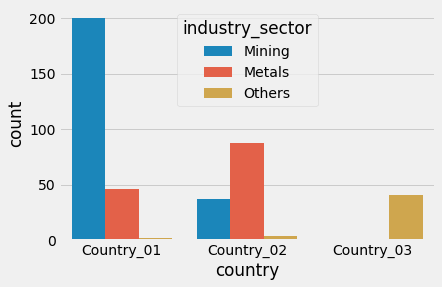

In [49]:
sns.countplot(x="country", data=industry_df, hue="industry_sector")

1. Country_01 has a lot of Mining related accidents followed by Employee accidents.
2. Country_02 has a lot of Metal related accidents followed by Third Party (Remote) accidents.
3. Country_03 has only data for Others.

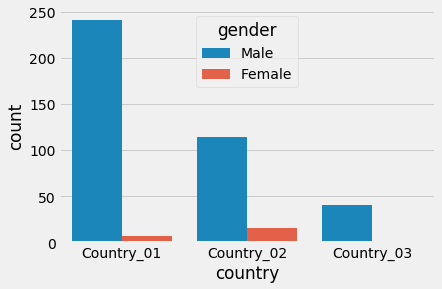

In [50]:
sns.countplot(x="country", data=industry_df,hue="gender")

Country_03 has no data for Female

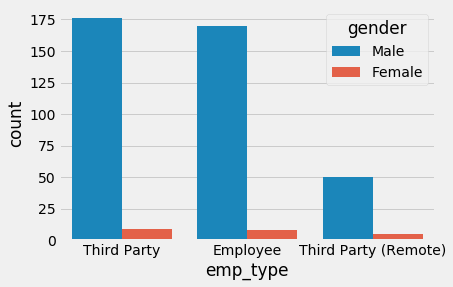

In [51]:
sns.countplot(x="emp_type", data=industry_df,hue="gender")

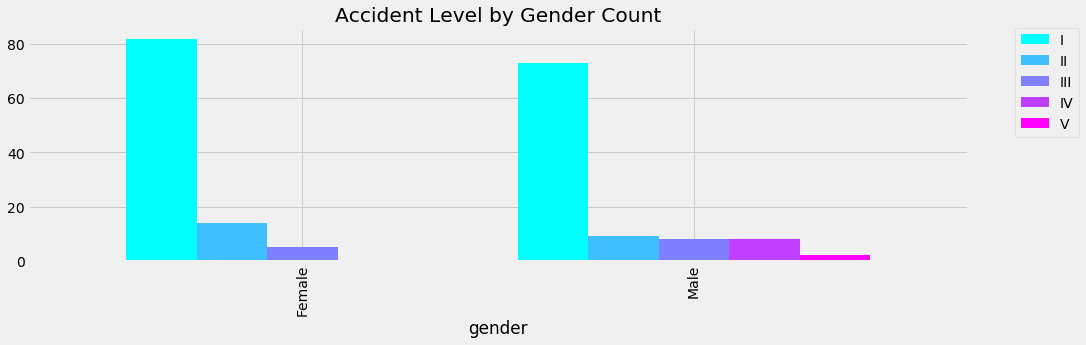

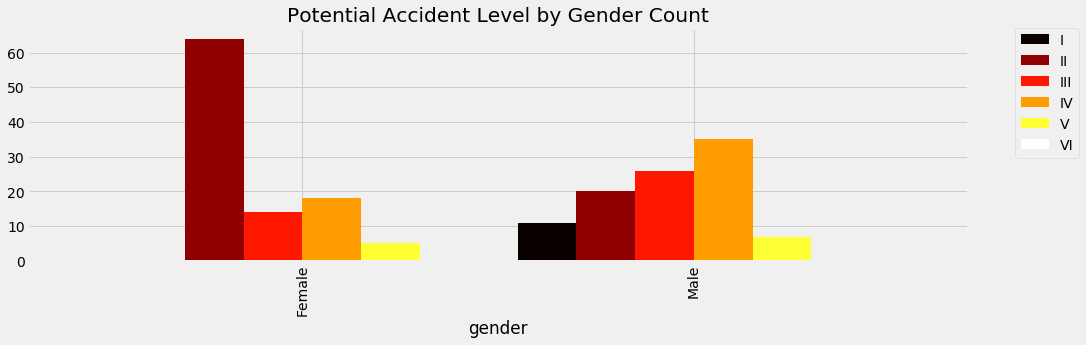

In [52]:
f = lambda x : np.round(x/x.sum() * 100)

ac_gen = industry_df.groupby(['gender','accident_level'])['accident_level'].count().unstack().apply(f, axis=1)
#ac = hv.Bars(pd.melt(ac_gen.reset_index(), ['gender']), ['gender','accident_level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = industry_df.groupby(['gender','potential_accident_level'])['potential_accident_level'].count().unstack().apply(f, axis=1)
#pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['gender']), ['gender','potential_accident_level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))

ac_gen.plot(kind='bar', figsize=(15,4), width=0.9, cmap='cool', title='Accident Level by Gender Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pot_ac_gen.plot(kind='bar', figsize=(15,4), width=0.9, cmap='hot', title='Potential Accident Level by Gender Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




#(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

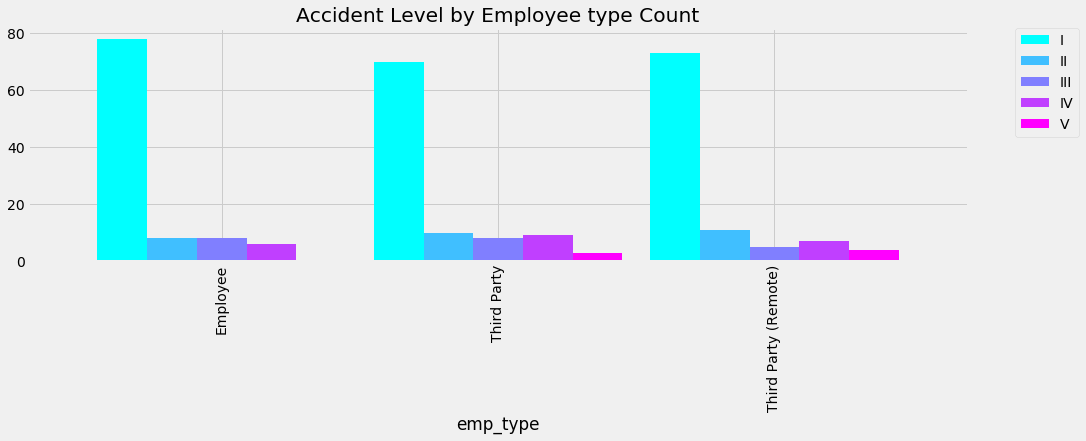

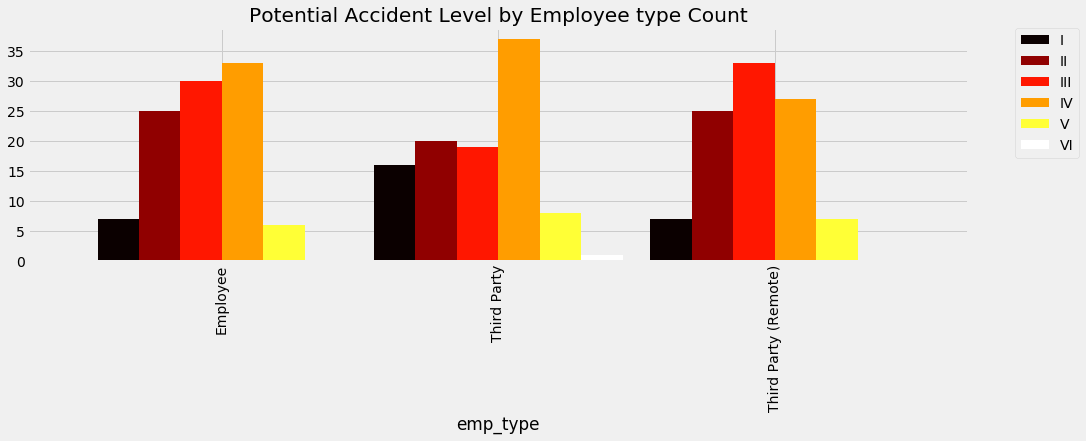

In [53]:
f = lambda x : np.round(x/x.sum() * 100)

ac_em = industry_df.groupby(['emp_type','accident_level'])['accident_level'].count().unstack().apply(f, axis=1)
#ac = hv.Bars(pd.melt(ac_em.reset_index(), ['emp_type']), ['emp_type','accident_level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))

pot_ac_em = industry_df.groupby(['emp_type','potential_accident_level'])['potential_accident_level'].count().unstack().apply(f, axis=1)
#pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ['emp_type']), ['emp_type','potential_accident_level'], 'value').opts(opts.Bars(title="Potential Accident Level by Employee type Count"))

ac_em.plot(kind='bar', figsize=(15,4), width=0.9, cmap='cool', title='Accident Level by Employee type Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pot_ac_em.plot(kind='bar', figsize=(15,4), width=0.9, cmap='hot', title='Potential Accident Level by Employee type Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



#(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))

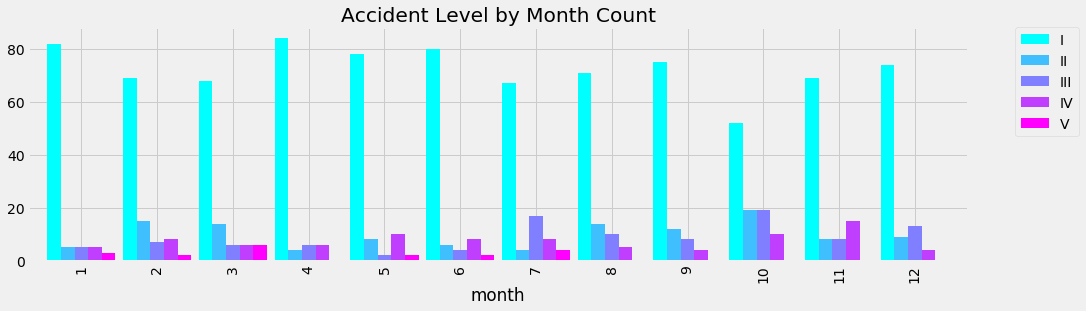

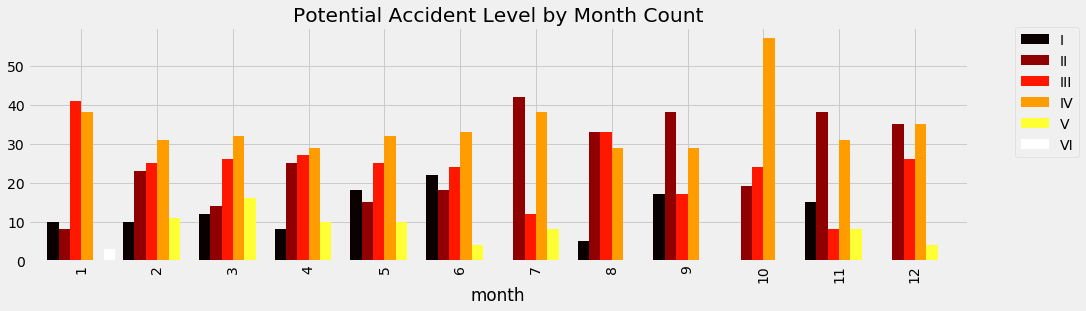

In [54]:
f = lambda x : np.round(x/x.sum() * 100)

ac_mo = industry_df.groupby(['month','accident_level'])['accident_level'].count().unstack().apply(f, axis=1).fillna(0)
#ac = hv.Curve(ac_mo['I'], label='I') * hv.Curve(ac_mo['II'], label='II') * hv.Curve(ac_mo['III'], label='III') * hv.Curve(ac_mo['IV'], label='IV') * hv.Curve(ac_mo['V'], label='V')\
        #.opts(opts.Curve(title="Accident Level by Month Count"))

pot_ac_mo = industry_df.groupby(['month','potential_accident_level'])['potential_accident_level'].count().unstack().apply(f, axis=1).fillna(0)
#pot_ac = hv.Curve(pot_ac_mo['I'], label='I') * hv.Curve(pot_ac_mo['II'], label='II') * hv.Curve(pot_ac_mo['III'], label='III') * hv.Curve(pot_ac_mo['IV'], label='IV')\
       # * hv.Curve(pot_ac_mo['V'], label='V') * hv.Curve(pot_ac_mo['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Month Count"))



ac_mo.plot(kind='bar', figsize=(15,4), width=0.9, cmap='cool', title='Accident Level by Month Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pot_ac_mo.plot(kind='bar', figsize=(15,4), width=0.9, cmap='hot', title='Potential Accident Level by Month Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#hv.extension('bokeh')      
#(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

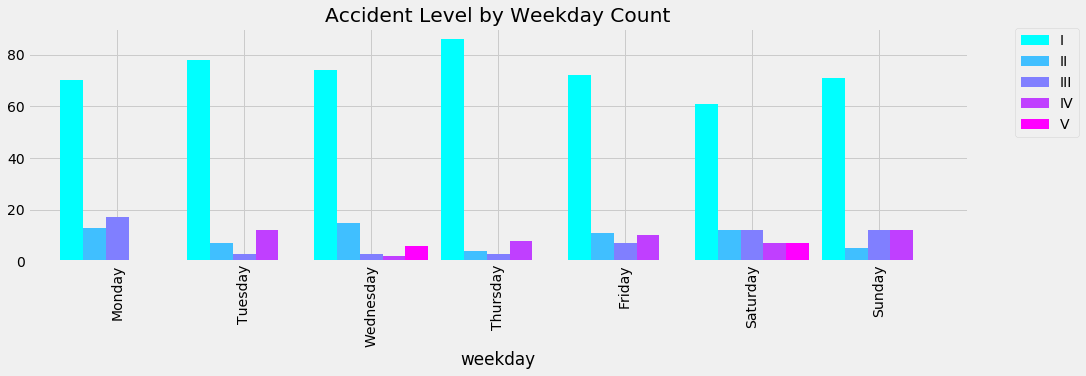

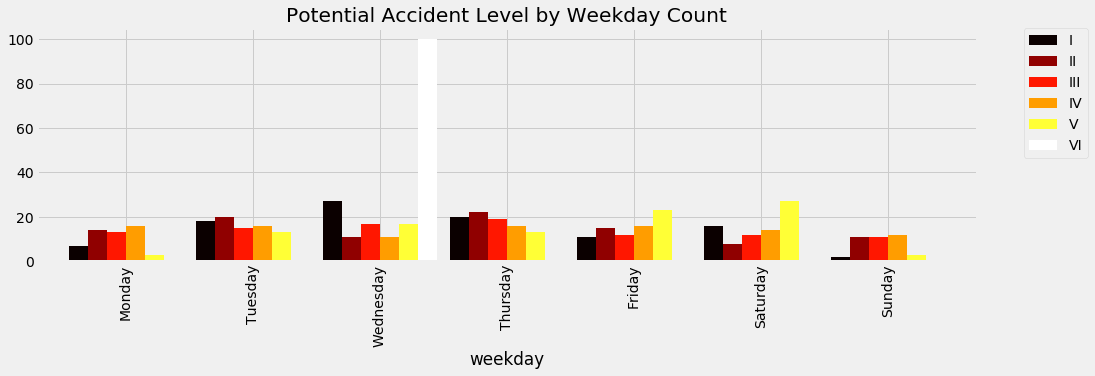

In [55]:
f = lambda x : np.round(x/x.sum() * 100)

ac_weekday = industry_df.groupby(['weekday','accident_level'])['accident_level'].count().unstack().apply(f, axis=1).fillna(0)
ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in ac_weekday.index]
ac_weekday.sort_values('week_num', inplace=True)
ac_weekday.drop('week_num', axis=1, inplace=True)
#ac = hv.Curve(ac_weekday['I'], label='I') * hv.Curve(ac_weekday['II'], label='II') * hv.Curve(ac_weekday['III'], label='III') * hv.Curve(ac_weekday['IV'], label='IV') * hv.Curve(ac_weekday['V'], label='V')\
        #.opts(opts.Curve(title="Accident Level by Weekday Count"))

pot_ac_weekday = industry_df.groupby(['weekday','potential_accident_level'])['potential_accident_level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in pot_ac_weekday.index]
pot_ac_weekday.sort_values('week_num', inplace=True)
pot_ac_weekday.drop('week_num', axis=1, inplace=True)
#pot_ac = hv.Curve(pot_ac_weekday['I'], label='I') * hv.Curve(pot_ac_weekday['II'], label='II') * hv.Curve(pot_ac_weekday['III'], label='III') * hv.Curve(pot_ac_weekday['IV'], label='IV')\
       # * hv.Curve(pot_ac_weekday['V'], label='V') * hv.Curve(pot_ac_weekday['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Weekday Count"))

ac_weekday.plot(kind='bar', figsize=(15,4), width=0.9, cmap='cool', title='Accident Level by Weekday Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pot_ac_weekday.plot(kind='bar', figsize=(15,4), width=0.9, cmap='hot', title='Potential Accident Level by Weekday Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#hv.extension('bokeh')   
#(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

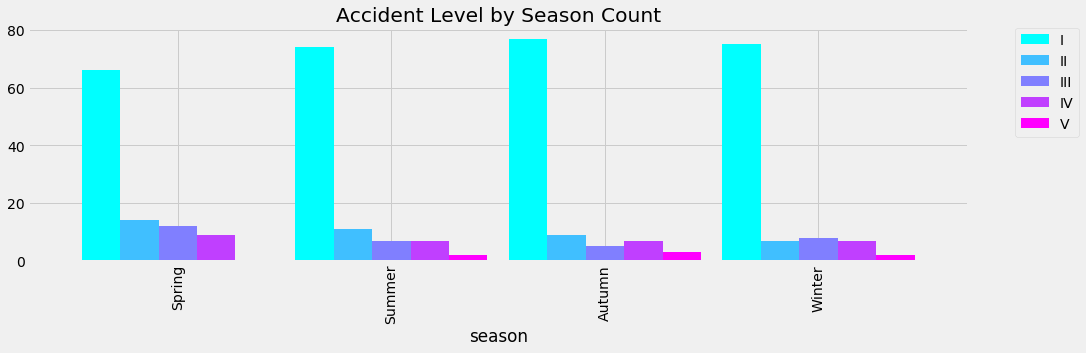

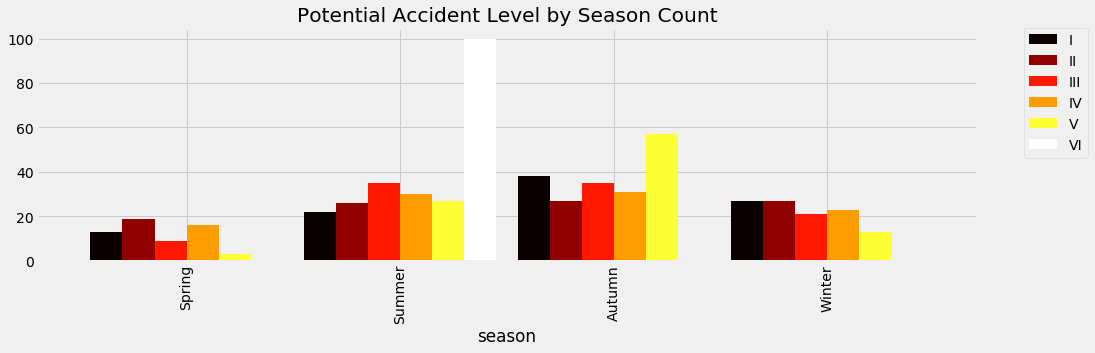

In [56]:
f = lambda x : np.round(x/x.sum() * 100)
ac_season = industry_df.groupby(['season','accident_level'])['accident_level'].count().unstack().apply(f, axis=1).fillna(0)
ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in ac_season.index]
ac_season.sort_values('season_num', inplace=True)
ac_season.drop('season_num', axis=1, inplace=True)
#ac = hv.Curve(ac_season['I'], label='I') * hv.Curve(ac_season['II'], label='II') * hv.Curve(ac_season['III'], label='III') * hv.Curve(ac_season['IV'], label='IV') * hv.Curve(ac_season['V'], label='V')\
        #.opts(opts.Curve(title="Accident Level by Season Count"))

pot_ac_season = industry_df.groupby(['season','potential_accident_level'])['potential_accident_level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in pot_ac_season.index]
pot_ac_season.sort_values('season_num', inplace=True)
pot_ac_season.drop('season_num', axis=1, inplace=True)
#pot_ac = hv.Curve(pot_ac_season['I'], label='I') * hv.Curve(pot_ac_season['II'], label='II') * hv.Curve(pot_ac_season['III'], label='III') * hv.Curve(pot_ac_season['IV'], label='IV')\
        #* hv.Curve(pot_ac_season['V'], label='V') * hv.Curve(pot_ac_season['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Season Count"))

ac_season.plot(kind='bar', figsize=(15,4), width=0.9, cmap='cool', title='Accident Level by Season Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pot_ac_season.plot(kind='bar', figsize=(15,4), width=0.9, cmap='hot', title='Potential Accident Level by Season Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#hv.extension('bokeh')
#(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

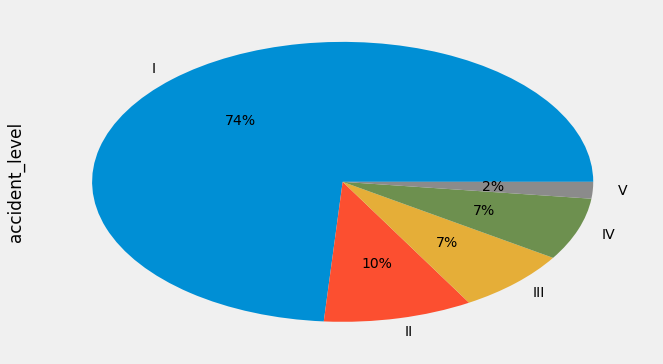

In [57]:
indexes = list(industry_df.loc[industry_df['description'].str.len() > 100, 'description'].index)
_ = industry_df.loc[indexes, 'accident_level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['I', 'II', 'III', 'IV', 'V'], figsize = (10, 6))

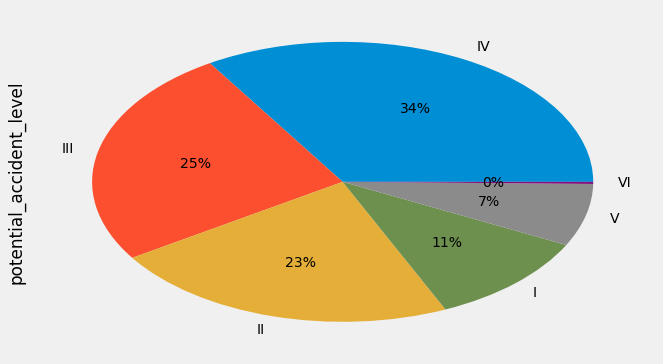

In [58]:
_ = industry_df.loc[indexes, 'potential_accident_level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['IV', 'III', 'II', 'I', 'V', 'VI'], figsize = (10, 6))

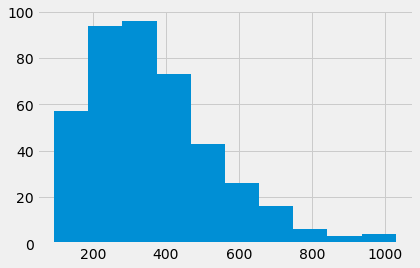

In [59]:
industry_df['description'].str.len().hist()

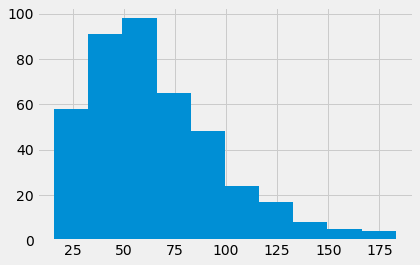

In [60]:
industry_df['description'].str.split().map(lambda x: len(x)).hist()

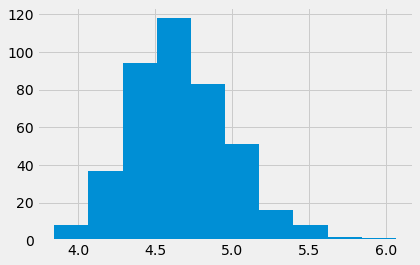

In [61]:
industry_df['description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [62]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\G621315\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

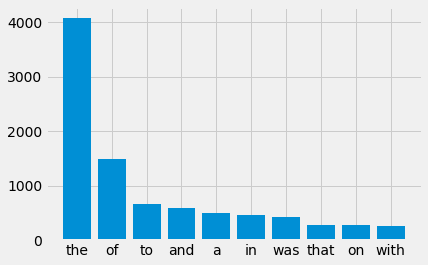

In [63]:
plot_top_stopwords_barchart(industry_df['description'])   

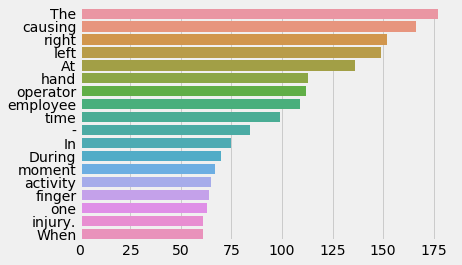

In [64]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(industry_df['description'])    

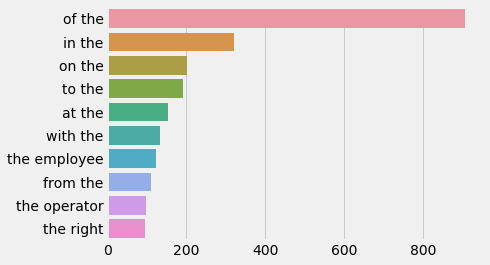

In [65]:

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(industry_df['description'],2)

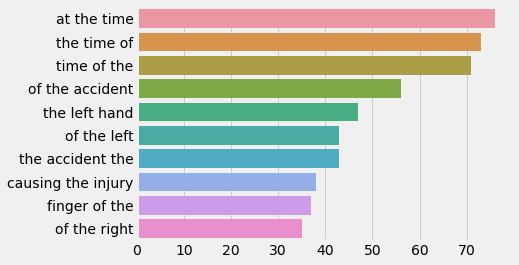

In [66]:
plot_top_ngrams_barchart(industry_df['description'],3)

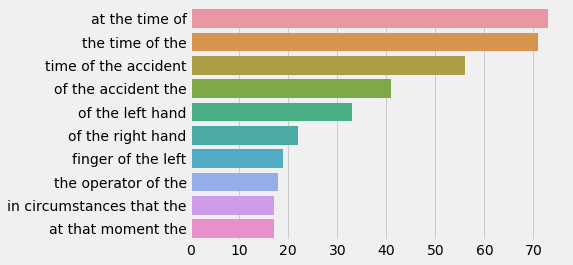

In [67]:
plot_top_ngrams_barchart(industry_df['description'],4)

## Preprocessing for Description column

In [68]:
industry_df = get_cleaned_desc(industry_df, 'description', 'cleaned_description')

Converting description to lower case
Replacing apostrophes to the standard lexicons
Removing punctuations
Applying Lemmatizer
Removing multiple spaces between words
Removing stop words


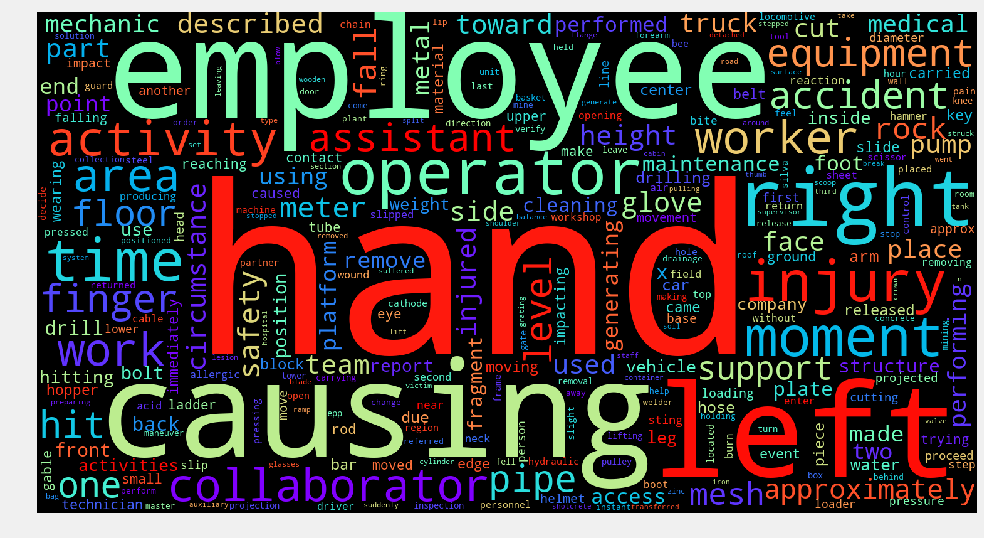

In [69]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(industry_df['cleaned_description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [70]:
# Get length of each line
industry_df['line_length'] = industry_df['cleaned_description'].str.len()

print(color.GREEN + color.BOLD + 'Minimum line length: ' + color.END + str(industry_df['line_length'].min()))
print(color.GREEN + color.BOLD + 'Maximum line length: ' + color.END + str(industry_df['line_length'].max()))
print(color.GREEN + color.BOLD + 'Line with maximum length: ' + color.END + str(industry_df[industry_df['line_length'] == industry_df['line_length'].max()]['cleaned_description'].values[0]))


# Get length of each word
industry_df['nb_words'] = industry_df['cleaned_description'].apply(lambda x: len(x.split(' ')))

print(color.BLUE + color.BOLD + 'Minimum number of words:  ' + color.END + str(industry_df['nb_words'].min()))
print(color.BLUE + color.BOLD + 'Maximum number of words:  ' + color.END + str(industry_df['nb_words'].max()))
print(color.BLUE + color.BOLD + 'Line with maximum number of words:  ' + color.END + str(industry_df[industry_df['nb_words'] == industry_df['nb_words'].max()]['cleaned_description'].values[0]))

Minimum line length: 64
Maximum line length: 680
Line with maximum length: level 3490 gallery 239 holding activity bolter equipment 24 operator performs drilling first hole support right gable 7footdeep drill end drill rod breaks leaving threads inside drilling machines shank operator assistant decide make two empty percussion attempts free threads shank without success third attempt assistant enters 38 corrugated iron central hole rest bar embedded shank generate pressure moment operator activates percussion generates movement shank hits palm victims left hand generating described injury worker wearing safety gloves time accident end corrugated iron contact left hand shaped like cane worker time accident positioned roof supported mesh split set
Minimum number of words:  10
Maximum number of words:  98
Line with maximum number of words:  performing sleeve removal maneuver hole 600 meters deep general silva pressed one side locking nut rods together jack holds entire weight rods maneuve

In [71]:
print(color.GREEN + 'Five point summary for number of words' + color.END)
display(industry_df['nb_words'].describe().round(0).astype(int)); 

print(color.GREEN+ '99% quantilie: ' + color.END + str(industry_df['nb_words'].quantile(0.99)))

Five point summary for number of words


count    418
mean      34
std       16
min       10
25%       21
50%       31
75%       43
max       98
Name: nb_words, dtype: int32

99% quantilie: 83.65999999999997


In [72]:
# define training data
sentences = industry_df['cleaned_description']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(color.BLUE+ "Word2Vec Model: " + color.END + str(model))

# summarize vocabulary
words = list(model.wv.index_to_key)
print(color.BLUE+ "Words: " + color.END + str(words))

# save model
model.save('model.bin')
print(color.GREEN+ "Model Saved successfully" + color.END)

# load model
new_model = Word2Vec.load('model.bin')
print(color.BLUE+ "Model loaded from Disk: " + color.END + str(new_model))

Word2Vec Model: Word2Vec(vocab=48, vector_size=100, alpha=0.025)
Words: [' ', 'e', 'i', 't', 'r', 'a', 'n', 'o', 's', 'l', 'c', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'b', 'y', 'v', 'k', 'w', '0', '1', 'x', 'j', '2', '5', '4', '3', 'q', '8', '7', '6', 'z', '9', '\u200b', '°', 'á', 'é', 'ã', 'ó', 'â', 'í', '¼', 'ô', 'ú']
Model Saved successfully
Model loaded from Disk: Word2Vec(vocab=48, vector_size=100, alpha=0.025)


In [73]:
embeddings_index = {}
EMBEDDING_FILE = 'glove.6B.200d.txt'
f = open(EMBEDDING_FILE, encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(color.GREEN + '\nWord vectors Found:' + color.END + str(len(embeddings_index)))

400000it [00:50, 7992.17it/s] 


Word vectors Found:400000


In [74]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

# create sentence GLOVE embeddings vectors using the above function for training and validation set
industry_glove_df = [sent2vec(x) for x in tqdm(industry_df['cleaned_description'])]

100%|██████████████████████████████████████████████████████████████████████████████| 418/418 [00:00<00:00, 1151.22it/s]


In [75]:
industry_glove_df[0]

array([ 1.39856245e-03,  8.99862126e-02,  1.08799164e-03, -3.09016760e-02,
        6.19197078e-03,  6.87033385e-02, -1.02347635e-01, -2.87667587e-02,
       -6.25691786e-02,  4.17288505e-02, -1.61288977e-02,  1.33184874e-02,
        1.12336598e-01,  1.67398853e-03,  8.71078447e-02, -1.93325020e-02,
       -3.66557874e-02, -2.86911987e-02,  7.09104389e-02,  8.07439629e-03,
       -4.30122279e-02,  6.14812076e-01,  9.06249657e-02,  1.87851384e-03,
        3.43448929e-02,  3.48158218e-02, -3.08507830e-02,  2.58244704e-02,
       -3.18089649e-02, -6.93444610e-02,  5.13918102e-02, -4.53802906e-02,
        1.09138573e-02, -1.77216530e-02,  1.88153088e-02, -3.13805038e-04,
       -8.93176496e-02, -6.43905252e-02, -7.05620348e-02,  4.99016382e-02,
        6.68967739e-02,  3.37204821e-02, -1.01575870e-02,  6.47136495e-02,
        3.32460664e-02,  6.59773797e-02,  4.91438136e-02,  2.39142426e-03,
        4.29478846e-02,  7.00706914e-02,  3.60498391e-02,  1.07721733e-02,
       -5.63761368e-02, -

Get top 30 Terms as columns

In [76]:
industry_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(industry_df['cleaned_description']).toarray()
    tfs = pd.DataFrame(X, columns=["tfidf_" + n for n in vec_tfidf.get_feature_names()])
    industry_tfidf_df = pd.concat([industry_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

industry_tfidf_df.head(3)

tfidf_activity  tfidf_area  tfidf_causing  tfidf_employee  tfidf_hand  \
0            0.00        0.00           0.00            0.00        0.00   
1            0.00        1.00           0.00            0.00        0.00   
2            0.00        0.55           0.38            0.00        0.41   

   tfidf_injury  tfidf_left  tfidf_operator  tfidf_right  tfidf_time  \
0          0.00        0.00            0.00         0.00        0.00   
1          0.00        0.00            0.00         0.00        0.00   
2          0.46        0.40            0.00         0.00        0.00   

   tfidf_causing injury  tfidf_described injury  tfidf_employee reports  \
0                  0.00                    0.00                    0.00   
1                  0.00                    0.00                    0.00   
2                  0.58                    0.00                    0.00   

   tfidf_finger left  tfidf_injury described  tfidf_left foot  \
0               0.00                    0.00             0.00   
1               0.00                    0.00             0.00   
2               0.00                    0.00             0.81   

   tfidf_left hand  tfidf_medical center  tfidf_right hand  \
0             0.00                  0.00              0.00   
1             0.00                  0.00              0.00   
2             0.00                  0.00              0.00   

   tfidf_time accident  tfidf_causing injury described  \
0                 0.00                            0.00   
1                 0.00                            0.00   
2                 0.00                            0.00   

   tfidf_described time accident  tfidf_finger left hand  \
0                           0.00                    0.00   
1                           0.00                    0.00   
2                           0.00                    0.00   

   tfidf_finger right hand  tfidf_generating described injury  \
0                     0.00                               0.00   
1                     0.00                               0.00   
2                     0.00                               0.00   

   tfidf_hand causing injury  tfidf_injury time accident  \
0                       0.00                        0.00   
1                       0.00                        0.00   
2                       0.00                        0.00   

   tfidf_left hand causing  tfidf_right hand causing  \
0                     0.00                      0.00   
1                     0.00                      0.00   
2                     0.00                      0.00   

   tfidf_time accident employee  
0                          0.00  
1                          0.00  
2                          0.00

In [77]:
# To replace white space everywhere in Employee type
industry_df['emp_type'] = industry_df['emp_type'].str.replace(' ', '_')
industry_df['emp_type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: emp_type, dtype: int64

In [78]:
# To replace white space everywhere in Critical Risk
industry_df['critical_risk'] = industry_df['critical_risk'].str.replace('\n', '').str.replace(' ', '_')
industry_df['critical_risk'].value_counts().head()

Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: critical_risk, dtype: int64

## Label Encoding for Categorical variables

In [79]:
# Create Industry DataFrame
industry_featenc_df = industry_df[['year','month','day','week_of_year']].reset_index(drop=True)

# Label encoding
industry_df['season'] = industry_df['season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
industry_featenc_df['season'] = LabelEncoder().fit_transform(industry_df['season']).astype(np.int8)

industry_df['weekday'] = industry_df['weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
industry_featenc_df['weekday'] = LabelEncoder().fit_transform(industry_df['weekday']).astype(np.int8)

industry_featenc_df['country'] = LabelEncoder().fit_transform(industry_df['country']).astype(np.int8)
industry_featenc_df['local'] = LabelEncoder().fit_transform(industry_df['local']).astype(np.int8)
industry_featenc_df['gender'] = LabelEncoder().fit_transform(industry_df['gender']).astype(np.int8)
industry_featenc_df['industry_sector'] = LabelEncoder().fit_transform(industry_df['industry_sector']).astype(np.int8)
industry_featenc_df['emp_type'] = LabelEncoder().fit_transform(industry_df['emp_type']).astype(np.int8)
industry_featenc_df['critical_risk'] = LabelEncoder().fit_transform(industry_df['critical_risk']).astype(np.int8)

industry_featenc_df['accident_level'] = LabelEncoder().fit_transform(industry_df['accident_level']).astype(np.int8)
industry_featenc_df['potential_accident_level'] = LabelEncoder().fit_transform(industry_df['potential_accident_level'].replace('I', 'aI').replace('II', 'bII').replace('III', 'cIII').replace('IV', 'dIV').replace('V', 'eV').replace('VI', 'fVI')).astype(np.int8)
industry_featenc_df.head(3)

year  month  day  week_of_year  season  weekday  country  local  gender  \
0  2016      1    1            53       0        4        0      0       1   
1  2016      1    2            53       0        5        1      1       1   
2  2016      1    6             1       0        2        0      2       1   

   industry_sector  emp_type  critical_risk  accident_level  \
0                1         1             20               0   
1                1         0             21               0   
2                1         2             14               0   

   potential_accident_level  
0                         3  
1                         3  
2                         2

In [80]:
industry_df['accident_level'].unique()

array(['I', 'IV', 'III', 'II', 'V'], dtype=object)

In [81]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(industry_featenc_df['accident_level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [82]:
np.any(np.isnan(industry_featenc_df))

False

In [83]:
industry_feat_df = industry_featenc_df.join(pd.DataFrame(industry_glove_df).iloc[:,0:30].reset_index(drop=True))


In [84]:
industry_feat_df = industry_featenc_df.join(industry_tfidf_df.reset_index(drop=True))

In [85]:
industry_feat_df.head()

year  month  day  week_of_year  season  weekday  country  local  gender  \
0  2016      1    1            53       0        4        0      0       1   
1  2016      1    2            53       0        5        1      1       1   
2  2016      1    6             1       0        2        0      2       1   
3  2016      1    8             1       0        4        0      3       1   
4  2016      1   10             1       0        6        0      3       1   

   industry_sector  emp_type  critical_risk  accident_level  \
0                1         1             20               0   
1                1         0             21               0   
2                1         2             14               0   
3                1         1             16               0   
4                1         1             16               3   

   potential_accident_level  tfidf_activity  tfidf_area  tfidf_causing  \
0                         3            0.00        0.00           0.00   
1                         3            0.00        1.00           0.00   
2                         2            0.00        0.55           0.38   
3                         0            0.00        0.00           0.35   
4                         3            0.00        0.00           0.53   

   tfidf_employee  tfidf_hand  tfidf_injury  tfidf_left  tfidf_operator  \
0            0.00        0.00          0.00        0.00            0.00   
1            0.00        0.00          0.00        0.00            0.00   
2            0.00        0.41          0.46        0.40            0.00   
3            0.00        0.75          0.42        0.37            0.00   
4            0.00        0.00          0.64        0.00            0.00   

   tfidf_right  tfidf_time  tfidf_causing injury  tfidf_described injury  \
0         0.00        0.00                  0.00                    0.00   
1         0.00        0.00                  0.00                    0.00   
2         0.00        0.00                  0.58                    0.00   
3         0.00        0.00                  0.73                    0.00   
4         0.56        0.00                  0.60                    0.00   

   tfidf_employee reports  tfidf_finger left  tfidf_injury described  \
0                    0.00               0.00                    0.00   
1                    0.00               0.00                    0.00   
2                    0.00               0.00                    0.00   
3                    0.00               0.00                    0.00   
4                    0.00               0.00                    0.80   

   tfidf_left foot  tfidf_left hand  tfidf_medical center  tfidf_right hand  \
0             0.00             0.00                  0.00              0.00   
1             0.00             0.00                  0.00              0.00   
2             0.81             0.00                  0.00              0.00   
3             0.00             0.69                  0.00              0.00   
4             0.00             0.00                  0.00              0.00   

   tfidf_time accident  tfidf_causing injury described  \
0                 0.00                            0.00   
1                 0.00                            0.00   
2                 0.00                            0.00   
3                 0.00                            0.00   
4                 0.00                            1.00   

   tfidf_described time accident  tfidf_finger left hand  \
0                           0.00                    0.00   
1                           0.00                    0.00   
2                           0.00                    0.00   
3                           0.00                    0.00   
4                           0.00                    0.00   

   tfidf_finger right hand  tfidf_generating described injury  \
0                     0.00                               0.00   
1                     0.00                            

Display old accident level counts

In [86]:
industry_feat_df['accident_level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: accident_level, dtype: int64

## Test-Train split

In [87]:
X = industry_feat_df.drop(['accident_level','potential_accident_level'], axis = 1) # Considering all Predictors
y = industry_feat_df['accident_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)

In [88]:
print(color.BLUE + 'X_train shape: ' + color.END + str((X_train.shape[0], X_train.shape[1])))
print(color.BLUE + 'y_train shape: ' + color.END + str(y_train.shape[0]))
print(color.BLUE + 'X_test shape: ' + color.END + str((X_test.shape[0], X_test.shape[1])))
print(color.BLUE + 'y_test shape: ' + color.END + str(y_test.shape[0]))

X_train shape: (334, 42)
y_train shape: 334
X_test shape: (84, 42)
y_test shape: 84


## Upsampling

In [89]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
pot_acc_level_0_majority = X_up[X_up['accident_level'] == 0]
pot_acc_level_1_minority = X_up[X_up['accident_level'] == 1]
pot_acc_level_2_minority = X_up[X_up['accident_level'] == 2]
pot_acc_level_3_minority = X_up[X_up['accident_level'] == 3]
pot_acc_level_4_minority = X_up[X_up['accident_level'] == 4]


# Upsample Level2 minority class
pot_acc_level_1_upsampled = resample(pot_acc_level_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(pot_acc_level_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
pot_acc_level_2_upsampled = resample(pot_acc_level_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(pot_acc_level_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
pot_acc_level_3_upsampled = resample(pot_acc_level_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(pot_acc_level_0_majority), # to match majority class
                                random_state = 1)


# Upsample Level5 minority class
pot_acc_level_4_upsampled = resample(pot_acc_level_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(pot_acc_level_0_majority), # to match majority class
                                random_state = 1)


industry_df_upsampled = pd.concat([pot_acc_level_0_majority, pot_acc_level_1_upsampled, pot_acc_level_2_upsampled, pot_acc_level_3_upsampled, pot_acc_level_4_upsampled])

In [90]:
industry_df_upsampled['accident_level'].value_counts()

4    247
3    247
2    247
1    247
0    247
Name: accident_level, dtype: int64

In [91]:
# Separate input features and target
X_train_up = industry_df_upsampled.drop(['accident_level'], axis = 1) # Considering all Predictors
y_train_up = industry_df_upsampled['accident_level']

## Smote

In [92]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)

df_smote.head()

year  month  day  week_of_year  season  weekday  country  local  gender  \
0  2016      9    1            35       3        3        1      4       1   
1  2016     11   29            48       3        1        1      7       1   
2  2016      1   16             2       0        5        1      4       1   
3  2016      4    7            14       1        3        0      2       1   
4  2017      2   27             9       0        0        0      2       1   

   industry_sector  emp_type  critical_risk  tfidf_activity  tfidf_area  \
0                0         2             14            0.00        0.00   
1                0         0             16            0.45        0.00   
2                0         0             10            0.00        0.00   
3                1         1             16            0.00        0.00   
4                1         1             32            0.00        0.77   

   tfidf_causing  tfidf_employee  tfidf_hand  tfidf_injury  tfidf_left  \
0           0.00            0.00        0.71          0.00        0.00   
1           0.00            0.37        0.73          0.00        0.36   
2           0.00            0.00        0.84          0.00        0.55   
3           0.00            0.00        0.00          0.00        0.64   
4           0.00            0.00        0.00          0.64        0.00   

   tfidf_operator  tfidf_right  tfidf_time  tfidf_causing injury  \
0            0.00         0.70        0.00                  0.00   
1            0.00         0.00        0.00                  0.00   
2            0.00         0.00        0.00                  0.00   
3            0.00         0.00        0.77                  0.00   
4            0.00         0.00        0.00                  0.00   

   tfidf_described injury  tfidf_employee reports  tfidf_finger left  \
0                    0.00                    0.00               0.00   
1                    0.00                    0.00               0.00   
2                    0.00                    0.00               0.00   
3                    0.00                    0.00               0.00   
4                    0.00                    0.00               0.00   

   tfidf_injury described  tfidf_left foot  tfidf_left hand  \
0                    0.00             0.00             0.00   
1                    0.00             0.00             1.00   
2                    0.00             0.00             1.00   
3                    0.00             0.82             0.00   
4                    0.00             0.00             0.00   

   tfidf_medical center  tfidf_right hand  tfidf_time accident  \
0                  0.00              1.00                 0.00   
1                  0.00              0.00                 0.00   
2                  0.00              0.00                 0.00   
3                  0.00              0.00                 0.58   
4                  0.00              0.00                 0.00   

   tfidf_causing injury described  tfidf_described time accident  \
0                            0.00                           0.00   
1                            0.00                           0.00   
2                            0.00                           0.00   
3                            0.00                           0.00   
4                            0.00                           0.00   

   tfidf_finger left hand  tfidf_finger right hand  \
0                    0.00                     0.00   
1                    0.00                     0.00   
2                    0.00                     0.00   
3                    0.00                     0.00   
4                    0.00                     0.00   

   tfidf_generating described injury  tfidf_hand causing injury  \
0                               0.00                       0.00   
1                               0.00                       0.00   
2                               0.00                       0.00   
3                 

In [93]:
columns_list=[]
for col in industry_df_upsampled.columns:
    columns_list.append(col)

df_smote.columns = columns_list

In [94]:
df_smote.head()

year  month  day  week_of_year  season  weekday  country  local  gender  \
0  2016      9    1            35       3        3        1      4       1   
1  2016     11   29            48       3        1        1      7       1   
2  2016      1   16             2       0        5        1      4       1   
3  2016      4    7            14       1        3        0      2       1   
4  2017      2   27             9       0        0        0      2       1   

   industry_sector  emp_type  critical_risk  tfidf_activity  tfidf_area  \
0                0         2             14            0.00        0.00   
1                0         0             16            0.45        0.00   
2                0         0             10            0.00        0.00   
3                1         1             16            0.00        0.00   
4                1         1             32            0.00        0.77   

   tfidf_causing  tfidf_employee  tfidf_hand  tfidf_injury  tfidf_left  \
0           0.00            0.00        0.71          0.00        0.00   
1           0.00            0.37        0.73          0.00        0.36   
2           0.00            0.00        0.84          0.00        0.55   
3           0.00            0.00        0.00          0.00        0.64   
4           0.00            0.00        0.00          0.64        0.00   

   tfidf_operator  tfidf_right  tfidf_time  tfidf_causing injury  \
0            0.00         0.70        0.00                  0.00   
1            0.00         0.00        0.00                  0.00   
2            0.00         0.00        0.00                  0.00   
3            0.00         0.00        0.77                  0.00   
4            0.00         0.00        0.00                  0.00   

   tfidf_described injury  tfidf_employee reports  tfidf_finger left  \
0                    0.00                    0.00               0.00   
1                    0.00                    0.00               0.00   
2                    0.00                    0.00               0.00   
3                    0.00                    0.00               0.00   
4                    0.00                    0.00               0.00   

   tfidf_injury described  tfidf_left foot  tfidf_left hand  \
0                    0.00             0.00             0.00   
1                    0.00             0.00             1.00   
2                    0.00             0.00             1.00   
3                    0.00             0.82             0.00   
4                    0.00             0.00             0.00   

   tfidf_medical center  tfidf_right hand  tfidf_time accident  \
0                  0.00              1.00                 0.00   
1                  0.00              0.00                 0.00   
2                  0.00              0.00                 0.00   
3                  0.00              0.00                 0.58   
4                  0.00              0.00                 0.00   

   tfidf_causing injury described  tfidf_described time accident  \
0                            0.00                           0.00   
1                            0.00                           0.00   
2                            0.00                           0.00   
3                            0.00                           0.00   
4                            0.00                           0.00   

   tfidf_finger left hand  tfidf_finger right hand  \
0                    0.00                     0.00   
1                    0.00                     0.00   
2                    0.00                     0.00   
3                    0.00                     0.00   
4                    0.00                     0.00   

   tfidf_generating described injury  tfidf_hand causing injury  \
0                               0.00                       0.00   
1                               0.00                       0.00   
2                               0.00                       0.00   
3                 

In [95]:
# Separate input features and target
X_train_smote = df_smote.iloc[:,:-1] # Considering all Predictors
y_train_smote = df_smote.iloc[:,-1:]
X_train_smote.head(1)

year  month  day  week_of_year  season  weekday  country  local  gender  \
0  2016      9    1            35       3        3        1      4       1   

   industry_sector  emp_type  critical_risk  tfidf_activity  tfidf_area  \
0                0         2             14            0.00        0.00   

   tfidf_causing  tfidf_employee  tfidf_hand  tfidf_injury  tfidf_left  \
0           0.00            0.00        0.71          0.00        0.00   

   tfidf_operator  tfidf_right  tfidf_time  tfidf_causing injury  \
0            0.00         0.70        0.00                  0.00   

   tfidf_described injury  tfidf_employee reports  tfidf_finger left  \
0                    0.00                    0.00               0.00   

   tfidf_injury described  tfidf_left foot  tfidf_left hand  \
0                    0.00             0.00             0.00   

   tfidf_medical center  tfidf_right hand  tfidf_time accident  \
0                  0.00              1.00                 0.00   

   tfidf_causing injury described  tfidf_described time accident  \
0                            0.00                           0.00   

   tfidf_finger left hand  tfidf_finger right hand  \
0                    0.00                     0.00   

   tfidf_generating described injury  tfidf_hand causing injury  \
0                               0.00                       0.00   

   tfidf_injury time accident  tfidf_left hand causing  \
0                        0.00                     0.00   

   tfidf_right hand causing  tfidf_time accident employee  
0                      0.00                          0.00

In [96]:
y_train_smote['accident_level'].value_counts()

4    247
3    247
2    247
1    247
0    247
Name: accident_level, dtype: int64

In [97]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_smote_dummy = np_utils.to_categorical(y_train_smote['accident_level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## Scaling

In [98]:
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:12] = pipeline.fit_transform(X_train.iloc[:,:12]) # Scaling only first 12 feautres

X_test.iloc[:,:12] = pipeline.fit_transform(X_test.iloc[:,:12]) # Scaling only first 12 feautres

X_train_up.iloc[:,:12] = pipeline.fit_transform(X_train_up.iloc[:,:12]) # Scaling only first 12 feautres
X_train_smote.iloc[:,:12] = pipeline.fit_transform(X_train_smote.iloc[:,:12]) # Scaling only first 12 feautres

In [99]:
X_train.head(3)

year  month   day  week_of_year  season  weekday  country  local  gender  \
202 -0.70   1.17 -1.67          1.00    1.73     0.08     0.75   0.10    0.24   
258 -0.70   1.80  1.56          1.93    1.73    -1.00     0.75   1.17    0.24   
6   -0.70  -1.36  0.06         -1.38   -1.22     1.15     0.75   0.10    0.24   

     industry_sector  emp_type  critical_risk  tfidf_activity  tfidf_area  \
202            -1.29      1.91          -0.29            0.00        0.00   
258            -1.29     -1.05           0.01            0.45        0.00   
6              -1.29     -1.05          -0.89            0.00        0.00   

     tfidf_causing  tfidf_employee  tfidf_hand  tfidf_injury  tfidf_left  \
202           0.00            0.00        0.71          0.00        0.00   
258           0.00            0.37        0.73          0.00        0.36   
6             0.00            0.00        0.84          0.00        0.55   

     tfidf_operator  tfidf_right  tfidf_time  tfidf_causing injury  \
202            0.00         0.70        0.00                  0.00   
258            0.00         0.00        0.00                  0.00   
6              0.00         0.00        0.00                  0.00   

     tfidf_described injury  tfidf_employee reports  tfidf_finger left  \
202                    0.00                    0.00               0.00   
258                    0.00                    0.00               0.00   
6                      0.00                    0.00               0.00   

     tfidf_injury described  tfidf_left foot  tfidf_left hand  \
202                    0.00             0.00             0.00   
258                    0.00             0.00             1.00   
6                      0.00             0.00             1.00   

     tfidf_medical center  tfidf_right hand  tfidf_time accident  \
202                  0.00              1.00                 0.00   
258                  0.00              0.00                 0.00   
6                    0.00              0.00                 0.00   

     tfidf_causing injury described  tfidf_described time accident  \
202                            0.00                           0.00   
258                            0.00                           0.00   
6                              0.00                           0.00   

     tfidf_finger left hand  tfidf_finger right hand  \
202                    0.00                     0.00   
258                    0.00                     0.00   
6                      0.00                     0.00   

     tfidf_generating described injury  tfidf_hand causing injury  \
202                               0.00                       0.00   
258                               0.00                       0.00   
6                                 0.00                       0.00   

     tfidf_injury time accident  tfidf_left hand causing  \
202                        0.00                     0.00   
258                        0.00                     0.00   
6                          0.00                     0.00   

     tfidf_right hand causing  tfidf_time accident employee  
202                      0.00                          0.00  
258                      0.00                          0.00  
6                        0.00                          0.00

In [100]:
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])


## Principal Component Analysis

In [101]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print(color.GREEN + 'Covariance Matrix: \n' + color.END + str(cov_matrix))

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print(color.GREEN + '\nEigenvectors: \n' + color.END + str(e_vecs))
print(color.GREEN + '\nEigenvalues \n' + color.END + str(e_vals))

Covariance Matrix: 
[[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -2.06945085e-03
  -4.89406968e-03 -5.68968778e-03]
 [-4.24727770e-01  1.00300300e+00  2.68776694e-02 ...  7.08759577e-03
   4.65172198e-03  5.42953855e-03]
 [ 2.53271550e-02  2.68776694e-02  1.00300300e+00 ... -1.28805019e-03
  -5.08213127e-03 -3.28488592e-03]
 ...
 [-2.06945085e-03  7.08759577e-03 -1.28805019e-03 ...  6.86698871e-03
  -7.05215662e-05 -1.74059396e-04]
 [-4.89406968e-03  4.65172198e-03 -5.08213127e-03 ... -7.05215662e-05
   5.61025313e-03 -1.20024227e-04]
 [-5.68968778e-03  5.42953855e-03 -3.28488592e-03 ... -1.74059396e-04
  -1.20024227e-04  1.63635526e-02]]

Eigenvectors: 
[[-3.50985509e-01  1.07572835e-01 -1.86205860e-01 ... -7.31043981e-03
   3.17588199e-03  6.73034750e-04]
 [ 5.60434833e-01 -2.76065216e-02 -6.26074591e-02 ... -2.36707634e-02
  -2.37858320e-02 -1.34427231e-03]
 [ 1.95724611e-02  1.26937026e-02 -4.77280078e-01 ...  4.67886712e-03
  -5.90609515e-04  9.54800459e-03]
 ...
 [ 3.125

In [102]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(color.GREEN + "Cumulative Variance Explained" + color.END + str(cum_var_exp))

Cumulative Variance Explained[ 21.336759    35.81180385  46.1042896   54.28798424  61.97216933
  69.04522482  75.59708343  81.14414139  85.79329539  88.94914261
  90.96218461  92.03997758  93.00239149  93.89478815  94.63153055
  95.15434601  95.65587516  96.09940529  96.53618407  96.90179603
  97.23078928  97.53117841  97.82054536  98.08732079  98.31641423
  98.54213721  98.74090751  98.91576645  99.06937588  99.21345933
  99.33658801  99.45234396  99.56072188  99.6600853   99.73632662
  99.79805195  99.85889802  99.91164705  99.950328    99.97442397
  99.98897747 100.        ]


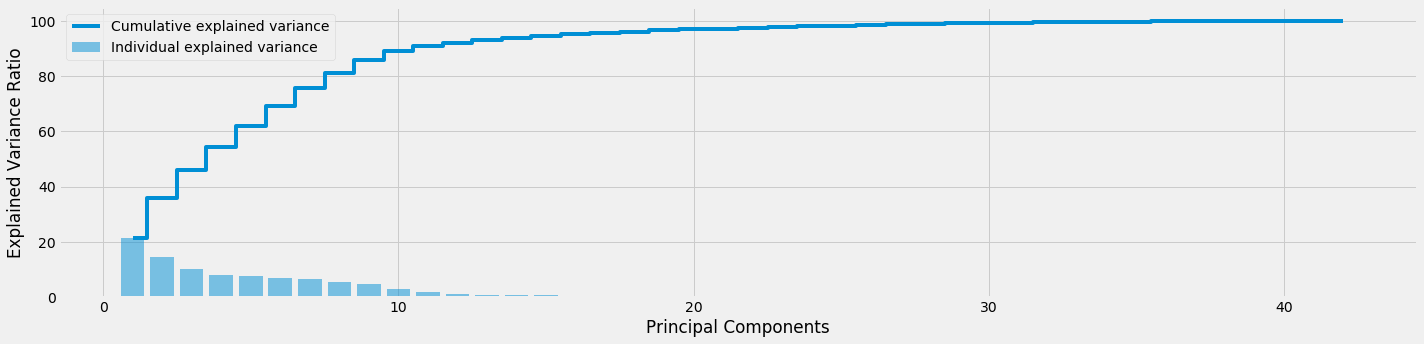

In [103]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Capturing 90% variance of the data

In [104]:
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 11)
(84, 11)


# Design, train and test Machine Learning classifiers

# Set benchmark

In [105]:
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print(color.GREEN + 'Unique predicted labels: ' + color.END + str(np.unique(dummy_pred)))

# checking accuracy
print(color.GREEN + 'Test score: ' + color.END + str(accuracy_score(y_test, dummy_pred)))

Unique predicted labels: [0 1 2 3 4]
Test score: 0.5119047619047619


In [106]:
yhat_probs = dummy.predict(X_test)
yhat_classes = (np.asarray(dummy.predict(X_test))).round()
accuracy = accuracy_score(y_test, yhat_classes)
precision = precision_score(y_test, yhat_classes, average='micro')
recall = recall_score(y_test, yhat_classes, average='micro')
f1 = f1_score(y_test, yhat_classes, average='micro')
print(color.BLUE + 'Accuracy: ' + color.END + str(accuracy))
print(color.BLUE + 'Precision: ' + color.END + str(precision))
print(color.BLUE + 'Recall: ' + color.END +  str(recall))
print(color.BLUE + 'F1 score: ' + color.END + str(f1))

Accuracy: 0.5952380952380952
Precision: 0.5952380952380952
Recall: 0.5952380952380952
F1 score: 0.5952380952380952


## Data with Label Encoding

In [107]:
train_test_allmodels(X_train, X_test, y_train, y_test, 'no')

[22:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression            0.74           0.73       0.56   
2              RidgeClassifier            0.74           0.74       0.56   
3         KNeighborsClassifier            0.75           0.70       0.57   
4                          SVC            0.74           0.74       0.54   
5       DecisionTreeClassifier            0.99           0.64       0.66   
6       RandomForestClassifier            0.95           0.73       0.56   
7            BaggingClassifier            0.96           0.73       0.62   
8         ExtraTreesClassifier            0.99           0.74       0.55   
9           AdaBoostClassifier            0.73           0.74       0.67   
10  GradientBoostingClassifier            0.94           0.68       0.55   
11              LGBMClassifier            0.99           0.74       0.64   
12               XGBClassifier            0.82           0.74       0.59   

    Recall  F1-Score  Multi-Class Logloss  
1     0.73      0.63                 0.88  
2     0.74      0.64                 1.00  
3     0.70      0.63                 6.48  
4     0.74      0.63                 0.90  
5     0.64      0.65                12.34  
6     0.73      0.63                 3.07  
7     0.73      0.64                 2.39  
8     0.74      0.63                 0.82  
9     0.74      0.66                 1.23  
10    0.68      0.61                 0.96  
11    0.74      0.68                 1.14  
12    0.74      0.65                 0.85

## Data with Upsampling

In [108]:
train_test_allmodels(X_train_up, X_test, y_train_up, y_test, 'no')

[22:24:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression            0.74           0.26       0.68   
2              RidgeClassifier            0.63           0.24       0.67   
3         KNeighborsClassifier            0.95           0.50       0.63   
4                          SVC            0.97           0.56       0.59   
5       DecisionTreeClassifier            1.00           0.61       0.65   
6       RandomForestClassifier            1.00           0.74       0.64   
7            BaggingClassifier            1.00           0.71       0.64   
8         ExtraTreesClassifier            1.00           0.74       0.61   
9           AdaBoostClassifier            0.40           0.61       0.59   
10  GradientBoostingClassifier            0.97           0.57       0.63   
11              LGBMClassifier            1.00           0.73       0.57   
12               XGBClassifier            1.00           0.68       0.63   

    Recall  F1-Score  Multi-Class Logloss  
1     0.26      0.35                 1.77  
2     0.24      0.29                 1.00  
3     0.50      0.55                11.75  
4     0.56      0.58                 1.31  
5     0.61      0.63                13.57  
6     0.74      0.67                 3.09  
7     0.71      0.68                 2.02  
8     0.74      0.65                 1.65  
9     0.61      0.60                 1.30  
10    0.57      0.60                 1.06  
11    0.73      0.64                 1.72  
12    0.68      0.64                 0.95

## Data with SMOTE

In [109]:
train_test_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')

[22:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression            0.77           0.26       0.57   
2              RidgeClassifier            0.71           0.24       0.61   
3         KNeighborsClassifier            0.92           0.32       0.55   
4                          SVC            0.95           0.43       0.54   
5       DecisionTreeClassifier            1.00           0.46       0.60   
6       RandomForestClassifier            0.99           0.57       0.59   
7            BaggingClassifier            1.00           0.57       0.58   
8         ExtraTreesClassifier            1.00           0.56       0.58   
9           AdaBoostClassifier            0.58           0.55       0.56   
10  GradientBoostingClassifier            0.96           0.55       0.58   
11              LGBMClassifier            1.00           0.65       0.59   
12               XGBClassifier            0.99           0.58       0.58   

    Recall  F1-Score  Multi-Class Logloss  
1     0.26      0.33                 1.92  
2     0.24      0.31                 1.00  
3     0.32      0.38                16.38  
4     0.43      0.47                 1.51  
5     0.46      0.52                18.50  
6     0.57      0.58                 3.67  
7     0.57      0.57                 2.98  
8     0.56      0.57                 1.14  
9     0.55      0.55                 1.33  
10    0.55      0.56                 1.20  
11    0.65      0.62                 1.72  
12    0.58      0.58                 1.16

# Design, train and test Neural networks classifiers

## Numeric Classification - Data with Label Encoded Target Variable

In [110]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile the keras model
#opt = optimizers.Adam(lr=1e-3)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/100
42/42 [==============================] - 5s 108ms/step - loss: 1.2392 - accuracy: 0.4675 - val_loss: 0.9094 - val_accuracy: 0.4643
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 0.8253 - accuracy: 0.4888 - val_loss: 0.9694 - val_accuracy: 0.6667
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 1.0125 - accuracy: 0.5756 - val_loss: 0.9071 - val_accuracy: 0.5833
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.8720 - accuracy: 0.4272 - val_loss: 0.9419 - val_accuracy: 0.4762
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.6629 - accuracy: 0.5380 - val_loss: 0.9377 - val_accuracy: 0.5714
Epoch 6/100
42/42 [==============================] - 0s 8ms/step - loss: 0.6298 - accuracy: 0.5937 - val_loss: 0.9888 - val_accuracy: 0.4048
Epoch 7/100
42/42 [==============================] - 0s 7ms/step - loss: 0.5741 - accuracy: 0.6397 - val_loss: 0.9343 - val_accuracy: 0.4762
Epoch 8/100

42/42 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.6227 - val_loss: 0.9905 - val_accuracy: 0.5000
Epoch 59/100
42/42 [==============================] - 0s 5ms/step - loss: 0.4819 - accuracy: 0.6228 - val_loss: 0.9905 - val_accuracy: 0.5000
Epoch 60/100
42/42 [==============================] - 0s 10ms/step - loss: 0.5598 - accuracy: 0.5810 - val_loss: 0.9905 - val_accuracy: 0.5000
Epoch 61/100
42/42 [==============================] - 0s 5ms/step - loss: 0.4780 - accuracy: 0.6249 - val_loss: 0.9905 - val_accuracy: 0.5000
Epoch 62/100
42/42 [==============================] - 0s 5ms/step - loss: 0.5722 - accuracy: 0.6010 - val_loss: 0.9905 - val_accuracy: 0.5000
Epoch 63/100
42/42 [==============================] - 0s 9ms/step - loss: 0.4778 - accuracy: 0.5815 - val_loss: 0.9905 - val_accuracy: 0.5000
Epoch 64/100
42/42 [==============================] - 0s 5ms/step - loss: 0.5505 - accuracy: 0.5736 - val_loss: 0.9905 - val_accuracy: 0.5000
Epoch 65/100
42/42

In [111]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2150      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                6040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 28,481
Trainable params: 28,481
Non-trainable params: 0
_________________________________________________________________


In [112]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train, y_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)

print(color.GREEN + 'Train accuracy: ' +color.END + str(train_accuracy*100))
print(color.GREEN + 'Test accuracy: ' + color.END + str(test_accuracy*100))

Train accuracy: 60.17963886260986
Test accuracy: 50.0


In [113]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test, '')
print(color.BLUE + 'Accuracy: ' + color.END + str(accuracy))
print(color.BLUE + 'Precision: ' + color.END + str(precision))
print(color.BLUE + 'Recall: ' + color.END +  str(recall))
print(color.BLUE + 'F1 score: ' + color.END + str(f1))

Accuracy: 0.4880952380952381
Precision: 0.4880952380952381
Recall: 0.4880952380952381
F1 score: 0.4880952380952381


Text(0.5,1,'Training and validation loss')

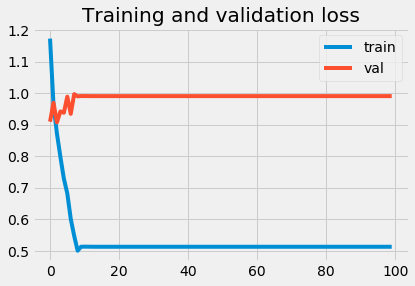

In [114]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot  (epochs, training_history.history['loss'], label = 'train')
plt.plot  (epochs, training_history.history['val_loss'], label = 'val')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5,1,'Training and validation accuracy')

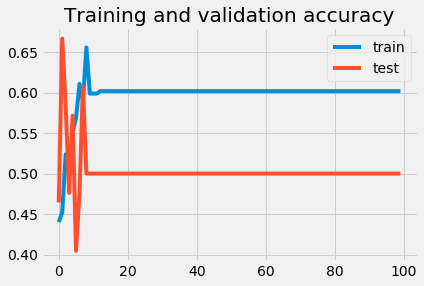

In [115]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

## Multiclass Classification - Data with One-hot Encoded Target variable

In [116]:
random_state = 42
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=2, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train_dummy, epochs=30, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/30
42/42 [==============================] - 2s 15ms/step - loss: 1.8607 - categorical_accuracy: 0.2621 - val_loss: 1.4091 - val_categorical_accuracy: 0.5357
Epoch 2/30
42/42 [==============================] - 0s 6ms/step - loss: 1.5224 - categorical_accuracy: 0.4636 - val_loss: 1.1892 - val_categorical_accuracy: 0.6667
Epoch 3/30
42/42 [==============================] - 0s 4ms/step - loss: 1.3699 - categorical_accuracy: 0.5326 - val_loss: 1.0751 - val_categorical_accuracy: 0.7024
Epoch 4/30
42/42 [==============================] - 0s 4ms/step - loss: 1.3232 - categorical_accuracy: 0.5730 - val_loss: 1.0067 - val_categorical_accuracy: 0.7143
Epoch 5/30
42/42 [==============================] - 0s 8ms/step - loss: 1.1348 - categorical_accuracy: 0.6409 - val_loss: 0.9727 - val_categorical_accuracy: 0.7143
Epoch 6/30
42/42 [==============================] - 0s 4ms/step - loss: 1.1459 - categorical_accuracy: 0.6720 - val_loss: 0.9536 - val_categorical_accuracy: 0.7381
Epoch 7/30
42/4

In [117]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                430       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [118]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train, y_train_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print(color.GREEN + 'Train accuracy: ' +color.END + str(train_accuracy*100))
print(color.GREEN + 'Test accuracy: ' + color.END + str(test_accuracy*100))

Train accuracy: 73.35329055786133
Test accuracy: 73.8095223903656


In [119]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test_dummy, target_type)
print(color.BLUE + 'Accuracy: ' + color.END + str(accuracy))
print(color.BLUE + 'Precision: ' + color.END + str(precision))
print(color.BLUE + 'Recall: ' + color.END +  str(recall))
print(color.BLUE + 'F1 score: ' + color.END + str(f1))

Accuracy: 0.7023809523809523
Precision: 0.7283950617283951
Recall: 0.7023809523809523
F1 score: 0.7151515151515152


Text(0.5,1,'Training and validation loss')

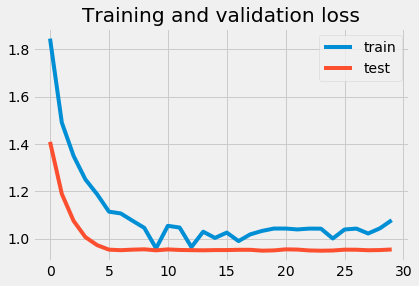

In [120]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5,1,'Training and validation accuracy')

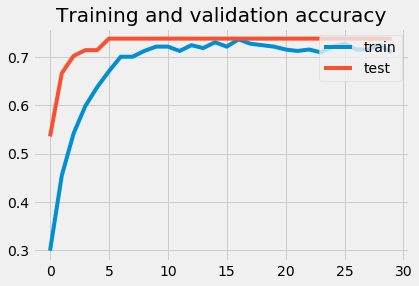

In [121]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [122]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print(color.GREEN + "Saved model weights to disk" + color.END)

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print(color.GREEN + "Saved model to disk" + color.END)

Saved model weights to disk
Saved model to disk


## Multiclass Classification - Data with SMOTE and One-hot Encoded Target variable

In [123]:
# fix random seed for reproducibility
random_state = 42
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train_smote.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_smote, y_train_smote_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train_smote, y_train_smote_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/100
155/155 [==============================] - 2s 5ms/step - loss: 1.9103 - categorical_accuracy: 0.2070 - val_loss: 1.6795 - val_categorical_accuracy: 0.1190
Epoch 2/100
155/155 [==============================] - 0s 3ms/step - loss: 1.6965 - categorical_accuracy: 0.2919 - val_loss: 1.7077 - val_categorical_accuracy: 0.1190
Epoch 3/100
155/155 [==============================] - 1s 4ms/step - loss: 1.6039 - categorical_accuracy: 0.3190 - val_loss: 1.6507 - val_categorical_accuracy: 0.1905
Epoch 4/100
155/155 [==============================] - 1s 7ms/step - loss: 1.5982 - categorical_accuracy: 0.2999 - val_loss: 1.6349 - val_categorical_accuracy: 0.2381
Epoch 5/100
155/155 [==============================] - 1s 3ms/step - loss: 1.5125 - categorical_accuracy: 0.3626 - val_loss: 1.6364 - val_categorical_accuracy: 0.2381
Epoch 6/100
155/155 [==============================] - 1s 3ms/step - loss: 1.5431 - categorical_accuracy: 0.3223 - val_loss: 1.6248 - val_categorical_accuracy: 0.250

Epoch 50/100
155/155 [==============================] - 1s 5ms/step - loss: 1.4000 - categorical_accuracy: 0.3761 - val_loss: 1.6205 - val_categorical_accuracy: 0.1667
Epoch 51/100
155/155 [==============================] - 1s 4ms/step - loss: 1.3772 - categorical_accuracy: 0.4298 - val_loss: 1.5977 - val_categorical_accuracy: 0.1905
Epoch 52/100
155/155 [==============================] - 1s 4ms/step - loss: 1.3567 - categorical_accuracy: 0.4113 - val_loss: 1.6061 - val_categorical_accuracy: 0.1786
Epoch 53/100
155/155 [==============================] - 0s 3ms/step - loss: 1.4049 - categorical_accuracy: 0.3833 - val_loss: 1.6057 - val_categorical_accuracy: 0.1905
Epoch 54/100
155/155 [==============================] - 1s 4ms/step - loss: 1.4057 - categorical_accuracy: 0.3992 - val_loss: 1.6212 - val_categorical_accuracy: 0.1786
Epoch 55/100
155/155 [==============================] - 0s 3ms/step - loss: 1.3747 - categorical_accuracy: 0.4031 - val_loss: 1.6213 - val_categorical_accuracy:

Epoch 99/100
155/155 [==============================] - 1s 4ms/step - loss: 1.3992 - categorical_accuracy: 0.3727 - val_loss: 1.6069 - val_categorical_accuracy: 0.1905
Epoch 100/100
155/155 [==============================] - 1s 4ms/step - loss: 1.3965 - categorical_accuracy: 0.4079 - val_loss: 1.5944 - val_categorical_accuracy: 0.1905


In [124]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                430       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                

In [125]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train_smote, y_train_smote_dummy, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print(color.GREEN + 'Train accuracy: ' + color.END + str(train_accuracy*100))
print(color.GREEN + 'Test accuracy: ' + color.END + str(test_accuracy*100))

Train accuracy: 52.06477642059326
Test accuracy: 19.0476194024086


In [126]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test_dummy, target_type)
print(color.BLUE + 'Accuracy: ' + color.END + str(accuracy))
print(color.BLUE + 'Precision: ' + color.END + str(precision))
print(color.BLUE + 'Recall: ' + color.END + str(recall))
print(color.BLUE + 'F1 score: ' + color.END + str(f1))

Accuracy: 0.011904761904761904
Precision: 0.14285714285714285
Recall: 0.011904761904761904
F1 score: 0.021978021978021973


Text(0.5,1,'Training and validation loss')

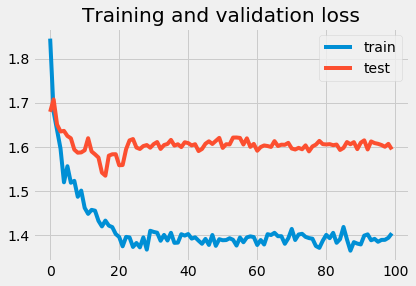

In [127]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5,1,'Training and validation accuracy')

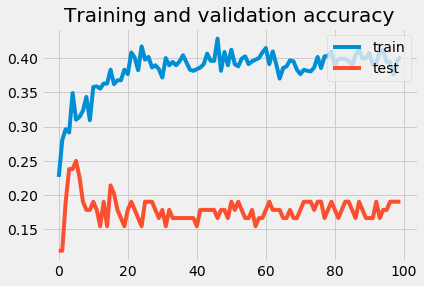

In [128]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [129]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print(color.GREEN + "Saved model weights to disk" + color.END)

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print(color.GREEN + "Saved model to disk" +  color.END)

Saved model weights to disk
Saved model to disk


# Design, train and test LSTM classifiers

## Model with Text Input

In [130]:
# Select input and output features
industry_df['input_desc'] = industry_df['cleaned_description'] + " " +industry_df['critical_risk']
industry_df['input_desc'] = industry_df['input_desc'].str.replace('\d+', '')
X_text = industry_df['input_desc']
y_text = industry_df['accident_level']
y_text = LabelEncoder().fit_transform(y_text)

In [131]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print(color.GREEN + 'X_text_train shape : ' + color.END + str(X_text_train.shape[0]))
print(color.GREEN + 'y_text_train shape : ' + color.END + str(y_text_train.shape[0]))
print(color.GREEN + 'X_text_test shape : ' + color.END + str(X_text_test.shape[0]))
print(color.GREEN + 'y_text_test shape : ' + color.END + str(y_text_test.shape[0]))

X_text_train shape : 334
y_text_train shape : 334
X_text_test shape : 84
y_text_test shape : 84


In [132]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = np_utils.to_categorical(y_text_train)
y_text_test = np_utils.to_categorical(y_text_test)

In [133]:
# The first step in word embeddings is to convert the words into their corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [134]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2765


In [135]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [136]:
random_state = 42

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [137]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 200)          553000    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 256)          336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0     

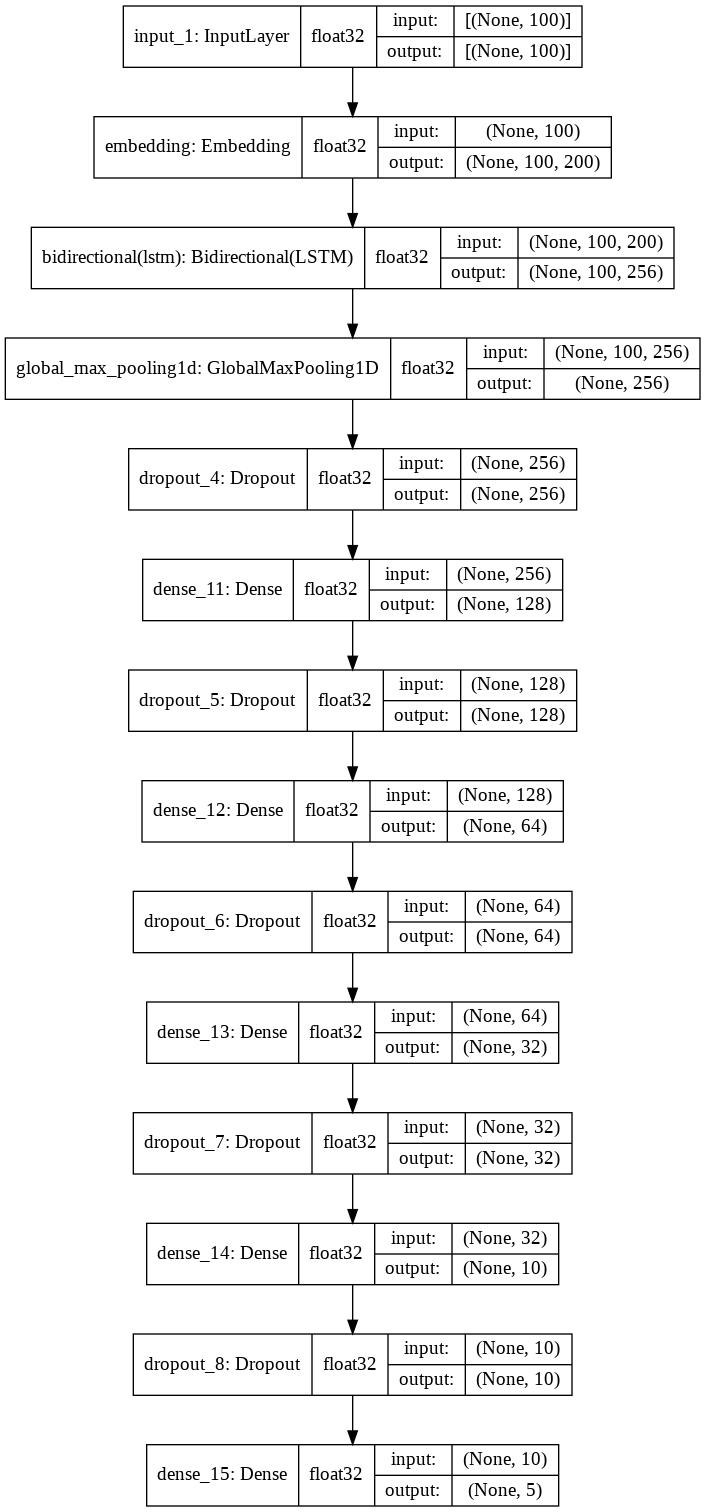

In [138]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_text_train, y_text_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 13s 169ms/step - loss: 1.6252 - acc: 0.3073 - val_loss: 1.3477 - val_acc: 0.7381
Epoch 2/100
42/42 [==============================] - 5s 114ms/step - loss: 1.3137 - acc: 0.6628 - val_loss: 1.1741 - val_acc: 0.7381
Epoch 3/100
42/42 [==============================] - 4s 101ms/step - loss: 1.1600 - acc: 0.7309 - val_loss: 1.0592 - val_acc: 0.7381
Epoch 4/100
42/42 [==============================] - 4s 104ms/step - loss: 1.3410 - acc: 0.7034 - val_loss: 1.0769 - val_acc: 0.7381ss: 1.4124 -  - ETA: 0s - loss: 1.3658 - acc:
Epoch 5/100
42/42 [==============================] - 5s 114ms/step - loss: 1.0966 - acc: 0.7396 - val_loss: 1.0146 - val_acc: 0.7381
Epoch 6/100
42/42 [==============================] - 5s 110ms/step - loss: 1.1030 - acc: 0.7386 - val_loss: 1.0176 - val_acc: 0.7381
Epoch 7/100
42/42 [==============================] - 5s 116ms/step - loss: 1.0122 - acc: 0.7817 - val_loss: 1.0033 - val_acc: 0.7381
Epoch 8/100
42/42 [====

42/42 [==============================] - 5s 110ms/step - loss: 0.9740 - acc: 0.7131 - val_loss: 0.9156 - val_acc: 0.7381
Epoch 62/100
42/42 [==============================] - 4s 102ms/step - loss: 0.9324 - acc: 0.7353 - val_loss: 0.9156 - val_acc: 0.7381
Epoch 63/100
42/42 [==============================] - 5s 111ms/step - loss: 0.8751 - acc: 0.7597 - val_loss: 0.9156 - val_acc: 0.7381
Epoch 64/100
42/42 [==============================] - 4s 103ms/step - loss: 0.9706 - acc: 0.7075 - val_loss: 0.9156 - val_acc: 0.7381
Epoch 65/100
42/42 [==============================] - 5s 112ms/step - loss: 0.9523 - acc: 0.7116 - val_loss: 0.9156 - val_acc: 0.7381
Epoch 66/100
42/42 [==============================] - 5s 112ms/step - loss: 0.9454 - acc: 0.7220 - val_loss: 0.9156 - val_acc: 0.7381
Epoch 67/100
42/42 [==============================] - 4s 100ms/step - loss: 0.8985 - acc: 0.7422 - val_loss: 0.9156 - val_acc: 0.7381
Epoch 68/100
42/42 [==============================] - 5s 109ms/step - loss:

In [139]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print(color.GREEN + 'Train accuracy: ' + color.END + str(train_accuracy*100))
print(color.GREEN + 'Test accuracy: ' + color.END + str(test_accuracy*100))

Train accuracy: 73.95209670066833
Test accuracy: 73.8095223903656


In [140]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_text_test, y_text_test, target_type)
print(color.BLUE + 'Accuracy: ' + color.END + str(accuracy))
print(color.BLUE + 'Precision: ' + color.END + str(precision))
print(color.BLUE + 'Recall: ' + color.END + str(recall))
print(color.BLUE + 'F1 score:' + color.END + str(f1))

Accuracy: 0.7380952380952381
Precision: 0.7380952380952381
Recall: 0.7380952380952381
F1 score:0.7380952380952381


Text(0.5,1,'Training and validation loss')

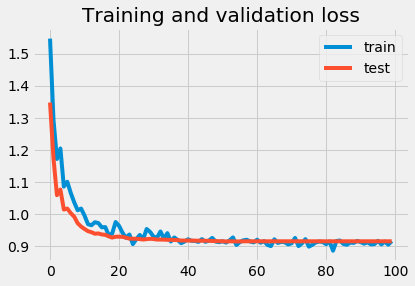

In [141]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5,1,'Training and validation accuracy')

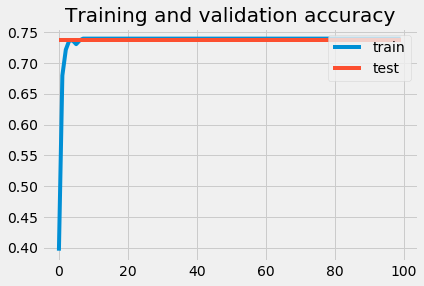

In [142]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [143]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model_v0.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


## Model using Categorical Values

In [144]:
# Select input and output features
X_cat = industry_featenc_df.drop(['accident_level','potential_accident_level'], axis = 1)
y_cat = industry_df['accident_level']

In [145]:
y_cat = LabelEncoder().fit_transform(y_cat)

In [146]:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print(color.GREEN + 'X_cat_train shape : ' + color.END + str(X_cat_train.shape[0]))
print(color.GREEN + 'y_cat_train shape : ' + color.END + str(y_cat_train.shape[0]))
print(color.GREEN + 'X_cat_test shape : ' + color.END + str(X_cat_test.shape[0]))
print(color.GREEN + 'y_cat_test shape : ' + color.END + str(y_cat_test.shape[0]))

X_cat_train shape : 334
y_cat_train shape : 334
X_cat_test shape : 84
y_cat_test shape : 84


In [147]:
y_cat_train = np_utils.to_categorical(y_cat_train)
y_cat_test = np_utils.to_categorical(y_cat_test)

In [148]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler()#StandardScaler()
X_cat_train.iloc[:,:12] = scaler_X.fit_transform(X_cat_train.iloc[:,:12]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:12] = scaler_X.fit_transform(X_cat_test.iloc[:,:12]) # Scaling only first 6 feautres

In [149]:
param = 1e-4

input2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_1 = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm())(input2)
drop_out_layer_1 = Dropout(0.2)(dense_layer_1)
batch_norm_layer_1 = BatchNormalization()(drop_out_layer_1)
dense_layer_2 = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_2 = Dropout(0.5)(dense_layer_2)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_2)
dense_layer_3 = Dense(5, activation='softmax', kernel_regularizer=l2(param), kernel_constraint=unit_norm())(batch_norm_layer_2)

model = Model(inputs=input2, outputs=dense_layer_3)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [150]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                130       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 10)                40        
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 10)                40  

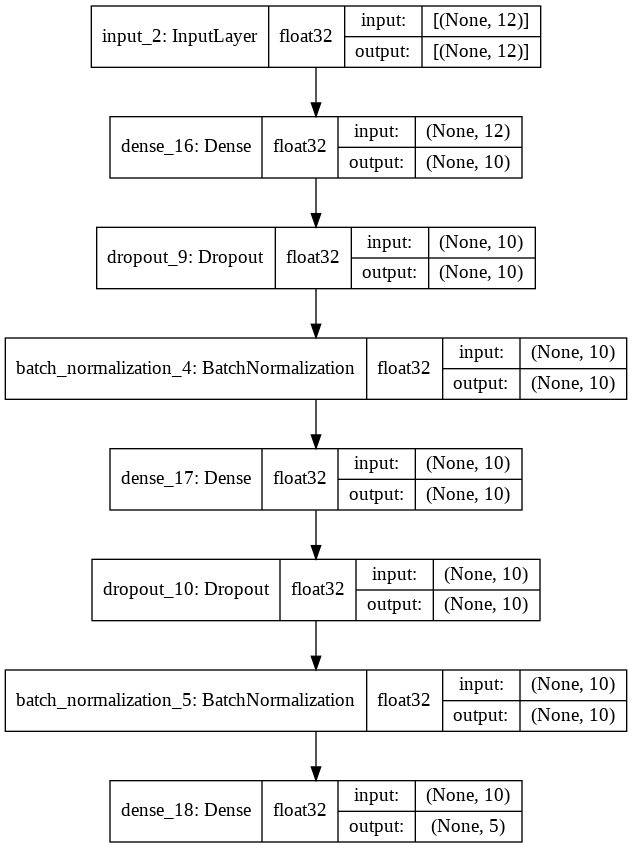

In [151]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_cat_train, y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_cat_train, y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 2s 15ms/step - loss: 1.9775 - acc: 0.2394 - val_loss: 1.3390 - val_acc: 0.5595
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 1.6395 - acc: 0.4161 - val_loss: 1.2014 - val_acc: 0.6667
Epoch 3/100
42/42 [==============================] - 0s 7ms/step - loss: 1.5061 - acc: 0.4335 - val_loss: 1.1241 - val_acc: 0.7143
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 1.3309 - acc: 0.5244 - val_loss: 1.0790 - val_acc: 0.7381
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 1.2454 - acc: 0.6239 - val_loss: 1.0538 - val_acc: 0.7381
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 1.0485 - acc: 0.6944 - val_loss: 1.0246 - val_acc: 0.7381
Epoch 7/100
42/42 [==============================] - 0s 12ms/step - loss: 0.9704 - acc: 0.7513 - val_loss: 1.0212 - val_acc: 0.7381
Epoch 8/100
42/42 [==============================] - 0s 5ms/step - loss: 1.0776 -

Epoch 63/100
42/42 [==============================] - 0s 5ms/step - loss: 0.8514 - acc: 0.7597 - val_loss: 0.9230 - val_acc: 0.7381
Epoch 64/100
42/42 [==============================] - 0s 5ms/step - loss: 0.9842 - acc: 0.7075 - val_loss: 0.9239 - val_acc: 0.7381
Epoch 65/100
42/42 [==============================] - 0s 5ms/step - loss: 0.9979 - acc: 0.7116 - val_loss: 0.9234 - val_acc: 0.7381
Epoch 66/100
42/42 [==============================] - 0s 5ms/step - loss: 0.9431 - acc: 0.7220 - val_loss: 0.9236 - val_acc: 0.7381
Epoch 67/100
42/42 [==============================] - 0s 5ms/step - loss: 0.9097 - acc: 0.7422 - val_loss: 0.9220 - val_acc: 0.7381
Epoch 68/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9947 - acc: 0.7083 - val_loss: 0.9225 - val_acc: 0.7381
Epoch 69/100
42/42 [==============================] - 0s 6ms/step - loss: 0.8911 - acc: 0.7367 - val_loss: 0.9225 - val_acc: 0.7381
Epoch 70/100
42/42 [==============================] - 0s 5ms/step - loss: 0.

In [152]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_cat_train, y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate(X_cat_test, y_cat_test, batch_size=8, verbose=0)

print(color.GREEN + 'Train accuracy: ' + color.END + str(train_accuracy*100))
print(color.GREEN + 'Test accuracy: ' + color.END + str(test_accuracy*100))

Train accuracy: 73.95209670066833
Test accuracy: 73.8095223903656


In [153]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_cat_test, y_cat_test, target_type)
print(color.BLUE + 'Accuracy: ' + color.END + str(accuracy))
print(color.BLUE + 'Precision:' + color.END + str(precision))
print(color.BLUE + 'Recall: ' + color.END + str(recall))
print(color.BLUE + 'F1 score: ' + color.END + str(f1))

Accuracy: 0.7380952380952381
Precision:0.7380952380952381
Recall: 0.7380952380952381
F1 score: 0.7380952380952381


Text(0.5,1,'Training and validation loss')

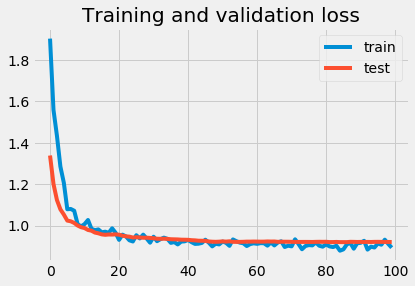

In [154]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5,1,'Training and validation accuracy')

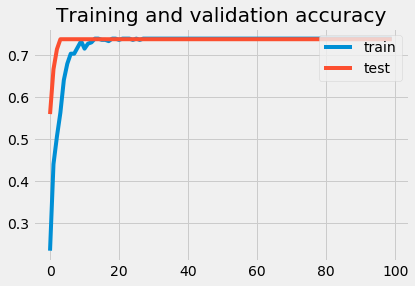

In [155]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [156]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model_v1.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


## Model using Text Inputs and Categorical Values

In [157]:
input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

#-------------------------------------------------------------------------------
param = 1e-4

input_2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                      kernel_constraint=unit_norm())(input_2)
drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [158]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 200)     553000      input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 100, 256)     336896      embedding_1[0][0]                
__________________________________________________________________________________________________
global_max_pooling1d_1 (GlobalM (None, 256)          0           bidirectional_1[0][0]            
____________________________________________________________________________________________

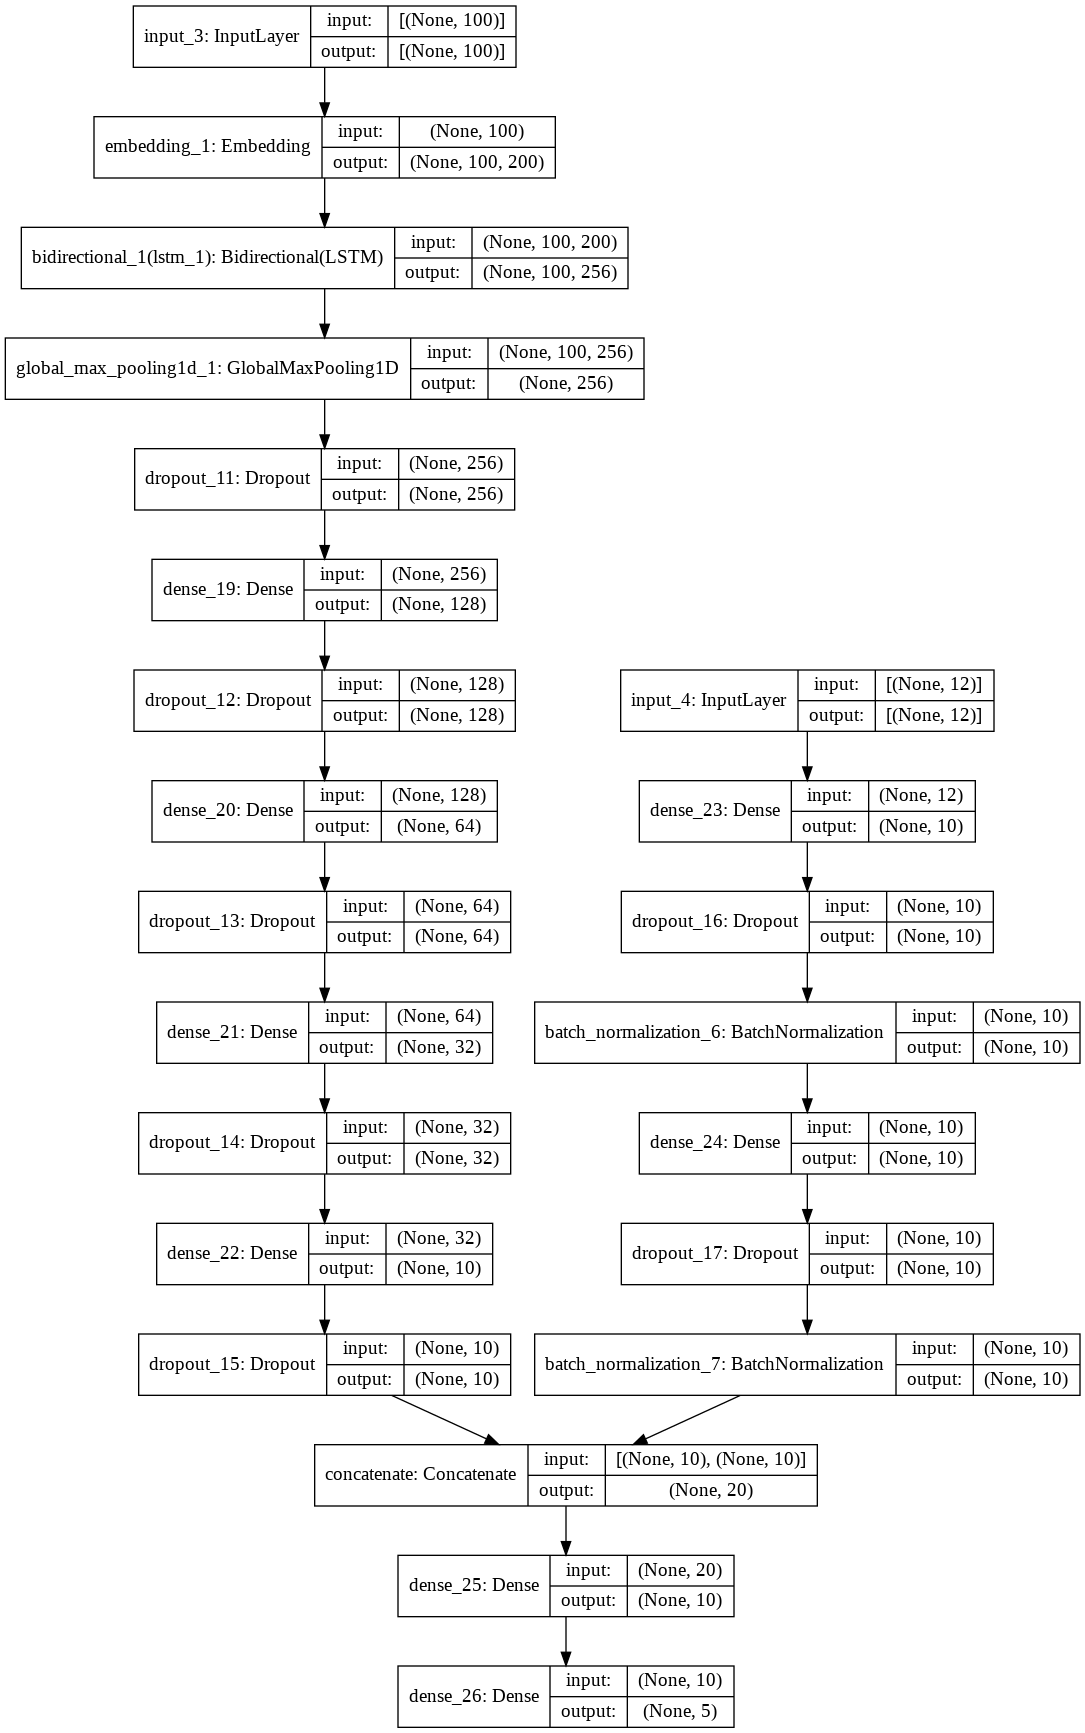

In [159]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit([X_text_train, X_cat_train], y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 14s 175ms/step - loss: 1.2883 - acc: 0.5824 - val_loss: 1.2806 - val_acc: 0.7381
Epoch 2/100
42/42 [==============================] - 5s 121ms/step - loss: 1.0993 - acc: 0.7330 - val_loss: 1.1707 - val_acc: 0.7381
Epoch 3/100
42/42 [==============================] - 6s 153ms/step - loss: 0.9987 - acc: 0.7401 - val_loss: 1.0878 - val_acc: 0.7381
Epoch 4/100
42/42 [==============================] - 5s 119ms/step - loss: 1.1155 - acc: 0.7029 - val_loss: 1.0573 - val_acc: 0.7381
Epoch 5/100
42/42 [==============================] - 6s 143ms/step - loss: 1.0526 - acc: 0.7398 - val_loss: 1.0369 - val_acc: 0.7381
Epoch 6/100
42/42 [==============================] - 5s 117ms/step - loss: 1.0358 - acc: 0.7424 - val_loss: 1.0295 - val_acc: 0.7381
Epoch 7/100
42/42 [==============================] - 7s 166ms/step - loss: 0.8943 - acc: 0.7843 - val_loss: 1.0264 - val_acc: 0.7381
Epoch 8/100
42/42 [==============================] - 6s 134ms/step -

42/42 [==============================] - 6s 143ms/step - loss: 0.9236 - acc: 0.7353 - val_loss: 0.9591 - val_acc: 0.7381
Epoch 63/100
42/42 [==============================] - 6s 143ms/step - loss: 0.8773 - acc: 0.7597 - val_loss: 0.9588 - val_acc: 0.7381
Epoch 64/100
42/42 [==============================] - 5s 131ms/step - loss: 0.9760 - acc: 0.7075 - val_loss: 0.9590 - val_acc: 0.7381
Epoch 65/100
42/42 [==============================] - 7s 158ms/step - loss: 0.9837 - acc: 0.7116 - val_loss: 0.9590 - val_acc: 0.7381
Epoch 66/100
42/42 [==============================] - 7s 157ms/step - loss: 0.9601 - acc: 0.7220 - val_loss: 0.9596 - val_acc: 0.7381
Epoch 67/100
42/42 [==============================] - 5s 116ms/step - loss: 0.9032 - acc: 0.7422 - val_loss: 0.9592 - val_acc: 0.7381
Epoch 68/100
42/42 [==============================] - 5s 115ms/step - loss: 0.9880 - acc: 0.7083 - val_loss: 0.9591 - val_acc: 0.7381
Epoch 69/100
42/42 [==============================] - 6s 144ms/step - loss:

In [160]:
# evaluate the keras model
_, train_accuracy = model.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = model.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=0)

print(color.GREEN + 'Train accuracy: ' + color.END + str(train_accuracy*100))
print(color.GREEN + 'Test accuracy: ' + color.END + str(test_accuracy*100))

Train accuracy: 73.95209670066833
Test accuracy: 73.8095223903656


In [161]:
accuracy, precision, recall, f1 = get_classification_metrics(model, [X_text_test, X_cat_test], y_cat_test, target_type)
print(color.BLUE + 'Accuracy: ' + color.END + str(accuracy))
print(color.BLUE + 'Precision: ' + color.END + str(precision))
print(color.BLUE + 'Recall: ' + color.END + str(recall))
print(color.BLUE + 'F1 score: ' + color.END + str(f1))

Accuracy: 0.7380952380952381
Precision: 0.7380952380952381
Recall: 0.7380952380952381
F1 score: 0.7380952380952381


Text(0.5,1,'Training and validation loss')

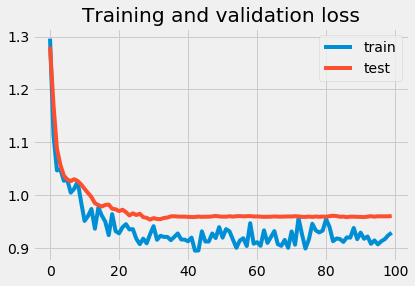

In [162]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5,1,'Training and validation accuracy')

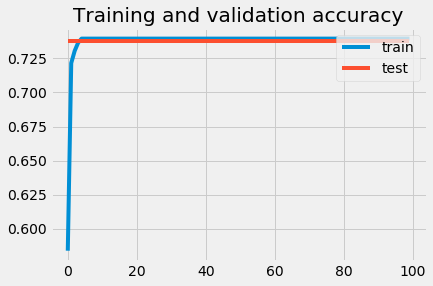

In [163]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [164]:
from io import StringIO
def chatbot_response(msg):
    op=""
    final_model = load_model("finalized_keras_model_v0.h5")
    s="desc"
    s = s+"\n"+msg
    StringData = StringIO(s)
    # let's read the data using the Pandas
    # read_csv() function
    df = pd.read_csv(StringData, sep =";")
    df_op = get_cleaned_desc_wo_print(df, 'desc', 'cleaned_desc')
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(df_op)
    df_op = tokenizer.texts_to_sequences(df_op)
    vocab_size = len(tokenizer.word_index) + 1
    maxlen = 100
    df_op = pad_sequences(df_op, padding='post', maxlen=maxlen)
    seq_predictions=final_model.predict(df_op[0]) 
    seq_predictions=seq_predictions[0]  # transformation to get (n,)
    seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))
    max_index = seq_predictions.index(max(seq_predictions)) + 1 
    if max_index==1:
        op = 'The accident Level is Minor'
    elif max_index==2:
        op = 'The accident Level is Moderate'
    elif max_index==3:
        op = 'The accident Level is Severe'
    elif max_index==4:
        op = 'The accident Level is Critical'
    elif max_index==5:
        op = 'The accident Level is Fatal' 
    return op

In [165]:
#Creating GUI with tkinter
import tkinter
from tkinter import *
def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    if (msg.lower() == 'hi') or (msg.lower() == 'hello'):
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
        ChatLog.insert(END, "Bot: Hello! Kindly put in the description of the accident" + '\n\n')
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)
    elif msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)
base = Tk()
base.title("Accident Level Prediction Bot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)
#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)
ChatLog.config(state=DISABLED)
#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set
#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )
#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)
#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)
base.mainloop()

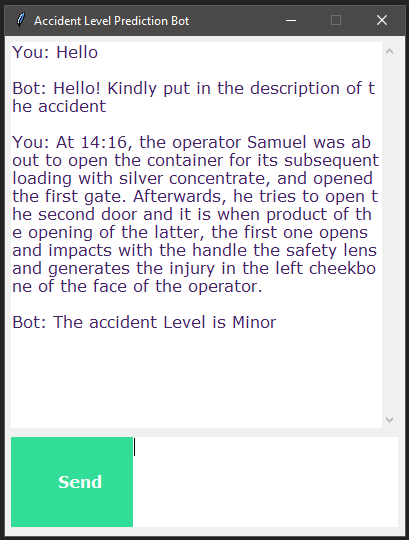